###1- **INTRODUCTION**

Identifier le problème Le cancer du sein est la tumeur maligne la plus fréquente chez les femmes, représentant près d'un cancer sur trois diagnostiqués chez les femmes aux États-Unis, et c'est la deuxième cause de décès par cancer chez les femmes. Le cancer du sein est le résultat d'une croissance anormale de cellules dans le tissu mammaire, communément appelée tumeur. Une tumeur n'est pas synonyme de cancer - les tumeurs peuvent être bénignes (non cancéreuses), pré-malignes (pré-cancéreuses) ou malignes (cancéreuses). Des tests tels que l'IRM, la mammographie, l'échographie et la biopsie sont couramment utilisés pour diagnostiquer le cancer du sein.

Identifier les sources de données Il s'agit d'une analyse du jeu de données Breast Cancer Wisconsin (Diagnostic) DataSet, obtenu sur Kaggle. Cet ensemble de données a été créé par le Dr William H. Wolberg, médecin à l'hôpital de l'Université du Wisconsin à Madison, Wisconsin, États-Unis. Pour créer cet ensemble de données, le Dr Wolberg a utilisé des échantillons de liquide prélevés sur des patientes présentant des masses mammaires solides et un programme informatique graphique facile à utiliser appelé Xcyt, qui est capable d'effectuer l'analyse des caractéristiques cytologiques sur la base d'un balayage numérique. Le programme utilise un algorithme d'ajustement de courbe pour calculer dix caractéristiques de chacune des cellules de l'échantillon, puis il calcule la valeur moyenne, la valeur extrême et l'erreur standard de chaque caractéristique pour l'image, renvoyant un vecteur de 30 valeurs réelles.

INFORMATIONS SUR LES ATTRIBUTS:

Ce jeu de données comprend un total de 569 instances, où chaque instance correspond à une tumeur mammaire. Il se compose de 32 attributs, dont le numéro d'identification, le diagnostic (bénigne ou maligne) et 30 caractéristiques réelles calculées pour chaque noyau cellulaire de la tumeur. Parmi ces instances, il y a 357 tumeurs bénignes et 212 tumeurs malignes. Ces caractéristiques incluent des mesures telles que le rayon, la texture, le périmètre, l'aire, la licéité, la compacité, la concavité, les points concaves, la symétrie et la dimension fractale.

1-ID number 2) Diagnosis (M = maligne, B = benigne) 3-32) Dix caractéristiques à valeur réelle sont calculées pour chaque noyau cellulaire :

2-radius (moyenne des distances entre le centre et les points du périmètre) 3-texture (écart-type des valeurs en niveaux de gris) 4-perimeter (quin représente le périimètre) 5-area (l'aire) 6-smoothness (variation locale de la longueur des rayons) 7-compactness (perimetre^2 / area - 1.0) 8-concavity (la sévérité des parties concaves du contour) 9-concave points (nombre de parties concaves du contour) 10-symmetry (symétrie) 11-fractal dimension (“approximation du trait de côte” - 1)

La moyenne, l'erreur standard et la "pire" ou la plus grande (moyenne des trois plus grandes valeurs) de ces caractéristiques ont été calculées pour chaque image, ce qui donne 30 caractéristiques. Par exemple, le champ 3 correspond au rayon moyen, le champ 13 au rayon SE et le champ 23 au pire rayon.

LA VARIABLE CIBLE est DIAGNOSIS (Diagnostic de la tumeur). Il est codé sous la forme de "M" pour les tumeurs malignes (cancéreuses) et "B" pour les tumeurs bénignes (non cancéreuses). C'est la variable cible que vous pouvez utiliser.

OBJECTIF:

Cette analyse vise à observer les caractéristiques les plus utiles pour prédire un cancer bénigne ou maligne et à dégager des tendances générales susceptibles de nous aider dans la sélection de modèles et d'hyperparamètres. L'objectif est de déterminer si le cancer du sein est bénigne ou maligne. Pour ce faire, j'ai utilisé des méthodes de classification par apprentissage automatique pour adapter une fonction capable de prédire la classe discrète d'une nouvelle entrée.

# Chargement des **données**

In [ ]:
#imports
import os

# Créer le répertoire 'data' s'il n'existe pas
if not os.path.exists('data'):
    os.makedirs('data')
# Utiliser le mode d'affichage inline pour les graphiques
%matplotlib inline

# Importer la bibliothèque de visualisation matplotlib.pyplot
import matplotlib.pyplot as plt

# Importer la bibliothèque de traitement de données pandas
import pandas as pd  # traitement de données, lecture/écriture de fichiers CSV par exemple

# Importer la bibliothèque numérique numpy
import numpy as np

# Importer la distribution normale de la bibliothèque scipy.stats
from scipy.stats import norm

# Importer la bibliothèque de visualisation Seaborn
import seaborn as sns  # visualisation

#plt.rcParams['figure.figsize'] = (15,8)
#plt.rcParams['axes.titlesize'] = 'large'

In [ ]:
#load libraries
import numpy as np         # linear algebra
import pandas as pd        # data processing

# Read the file "data.csv" and print the contents.
#!cat data/data.csv
data = pd.read_csv('data.csv', index_col=False,)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Nous voyons qu'il y a une colonne Unnamed: 32 qui ne sera pas utile pour nous donc nous avons bésoin de le supprimer.

In [ ]:
# Supprimer la colonne 'id' car elle est redondante et inutile
#data.drop('id', axis=1, inplace=True)

# Supprimer la colonne 'Unnamed: 0' si nécessaire
data.drop('Unnamed: 32', axis=1, inplace=True)

# Afficher les deux premières lignes du DataFrame après les suppressions
data.head(2)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
data.shape

(569, 32)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.dtypes.value_counts()


float64    30
int64       1
object      1
dtype: int64

Dans les résultats affichés, nous pouvons voir que les données comportent 569 enregistrements, chacun avec 32 colonnes.

La méthode "info()" fournit un résumé concis des données ; à partir de la sortie, elle fournit le type de données dans chaque colonne, le nombre de valeurs non nulles dans chaque colonne et la quantité de mémoire utilisée par le cadre de données.

La méthode dtype.value_counts() renvoie le nombre de colonnes de chaque type du DataFrame .


D'après les résultats ci-dessus, sur les 32 variables, l'identifiant de colonne numéro 1 est un entier, le diagnostic 569 est un objet non nul et le reste est un flottant.

In [ ]:
# Vérifier la présence de valeurs manquantes dans chaque colonne
missing_values = data.isnull().any()

# Afficher les colonnes avec des valeurs manquantes
print(missing_values)


id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [ ]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

D'après les résultats ci-dessus, le diagnostic est une variable catégorielle, car il représente un nombre fixe de valeurs possibles (c'est-à-dire maligne ou bénigne). Les algorithmes d'apprentissage automatique ont besoin de nombres, et non de chaînes de caractères, comme données d'entrée ; nous avons donc besoin d'une méthode de codage pour les conversion.

In [ ]:
data.drop('id', axis=1, inplace=True)
# Enregistrer la version nettoyée du DataFrame dans un fichier CSV
data.to_csv('data/clean-data.csv', index=False)

# Afficher un message de confirmation
print("DataFrame nettoyé enregistré avec succès dans 'data/clean-data.csv'")


DataFrame nettoyé enregistré avec succès dans 'data/clean-data.csv'


Maintenant que nous avons une bonne idée intuitive des données, l'étape suivante consiste à examiner de plus près les attributs et les valeurs des données par une analyse descriptive.

# 2-ANALYSE DESCRIPTIVE

Maintenant que nous avons une bonne perception intuitive des données, l'étape suivante consiste à examiner de plus près les attributs et les valeurs des données. Dans cette section, nous nous familiarison avec les données, ce qui me permettra d'acquérir des connaissances utiles pour le prétraitement des données.

# 2.1 Objectifs de l'exploration des données

L'analyse exploratoire des données (AED) est une étape très importante qui intervient après l'ingénierie des caractéristiques et l'acquisition des données et qui doit être réalisée avant toute modélisation. En effet, il est très important pour nous de pouvoir comprendre la nature des données sans faire d'hypothèses. Les résultats de l'exploration des données peuvent être extrêmement utiles pour comprendre la structure des données, la distribution des valeurs, la présence de valeurs extrêmes et les interrelations au sein de l'ensemble de données.

Pour que le prétraitement des données soit efficace, il est essentiel d'avoir une vue d'ensemble de vos données
Des descriptions statistiques de base peuvent seront utilisées pour identifier les propriétés des données et mettre en évidence les valeurs à traiter comme du bruit ou des valeurs aberrantes**.

L'étape suivante consiste à explorer les données.Deux approches sont utilisées pour examiner les données :

*Les statistiques descriptives* consistent à condenser les principales caractéristiques de l'ensemble des données en mesures numériques simples. Certaines des mesures les plus courantes sont la moyenne, l'écart-type et la corrélation.
*La visualisation* est le processus qui consiste à projeter les données, ou des parties de celles-ci, dans un espace cartésien ou dans des images abstraites. Dans le processus d'exploration des données, l'exploration des données est exploitée dans de nombreuses étapes différentes, y compris le prétraitement, la modélisation et l'interprétation des résultats.

# 2.2 Statistiques descriptives

In [ ]:
data = pd.read_csv('data/clean-data.csv', index_col=False)

data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
#statistique descriptive basique
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Résumé statistique des variables numériques
summary = data.describe()

# Affichage du résumé statistique
print(summary)

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [ ]:
data.skew()

<ipython-input-14-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

 Une valeur d'asymétrie positive indique une queue de distribution étirée vers la droite (asymétrie positive), tandis qu'une valeur négative indique une queue de distribution étirée vers la gauche (asymétrie négative)



In [ ]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


Maligne = 1 (indique la présence de cellules cancéreuses)
Bénigne = 0 (indique l'absence)

357 observations indiquant l'absence de cellules cancéreuses et 212 observations indiquant l'absence de cellules cancéreuses

Confirmons cela en traçant l'histogramme

# 2.3 Visualisations de données unimodales

L'un des principaux objectifs de la visualisation des données est d'observer quelles caractéristiques sont les plus utiles pour prédire un cancer malin ou bénin. L'autre objectif est de voir les tendances générales qui peuvent nous aider à sélectionner des modèles et des hyperparamètres.

Nous allons appliquer 3 techniques pour comprendre chaque attribut de votre ensemble de données de manière indépendante.

Histogrammes.
Graphiques de densité.
Graphiques en boîte et en moustache.

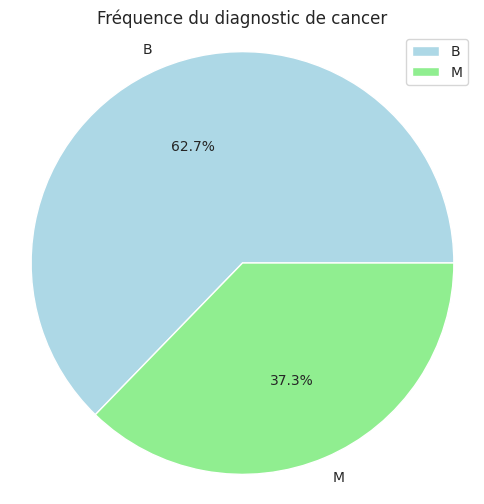

In [ ]:
# Créer une table de fréquence
diagnosis_table = data['diagnosis'].value_counts()

# Créer un diagramme circulaire
plt.figure(figsize=(6, 6))
colors = ['lightblue', 'lightgreen']
plt.pie(diagnosis_table, labels=diagnosis_table.index, autopct='%1.1f%%', colors=colors)
plt.title('Fréquence du diagnostic de cancer')
plt.legend(diagnosis_table.index)
plt.axis('equal')

# Afficher le diagramme circulaire
plt.show()

# 2.3.1 Visualisation des distributions via des histogrammes

Les histogrammes sont couramment utilisés pour visualiser des variables numériques. Un histogramme est similaire à un diagramme à barres après que les valeurs de la variable ont été regroupées (binées) en un nombre fini d'intervalles (bins).

Les histogrammes regroupent les données en cases et fournissent un décompte du nombre d'observations dans chaque case. La forme des cases permet de déterminer rapidement si un attribut est gaussien, asymétrique ou si sa distribution est exponentielle. Cela peut également nous aider à repérer d'éventuelles valeurs aberrantes.

**Séparer les colonnes dans des cadres de données plus petits pour effectuer une visualisation**

In [ ]:
# Séparer les colonnes en groupes en fonction de leur suffixe (_mean, _se, et _worst)
# pour effectuer des tracés de visualisation. Rejoindre les colonnes 'id' et 'diagnosis' à nouveau.
# Supprimer la colonne 'Unnamed: 0' si nécessaire
data.drop('Unnamed: 32', axis=1, inplace=True)
data_id_diag = data.loc[:, ["id", "diagnosis"]]
data_diag = data.loc[:, ["diagnosis"]]
data.drop('id', axis=1, inplace=True)

# Pour une fusion (merge) + découpe (slice) :
data_mean = data.iloc[:, 1:11]  # Colonnes de _mean
data_se = data.iloc[:, 11:21]   # Colonnes de _se
data_worst = data.iloc[:, 22:]  # Colonnes de _worst

# Afficher les noms de colonnes de chaque groupe si nécessaire
print(data_id_diag.columns)
print(data_mean.columns)
print(data_se.columns)
print(data_worst.columns)


Index(['id', 'diagnosis'], dtype='object')
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


**Histogramme de la désignation du suffixe "_mean".**

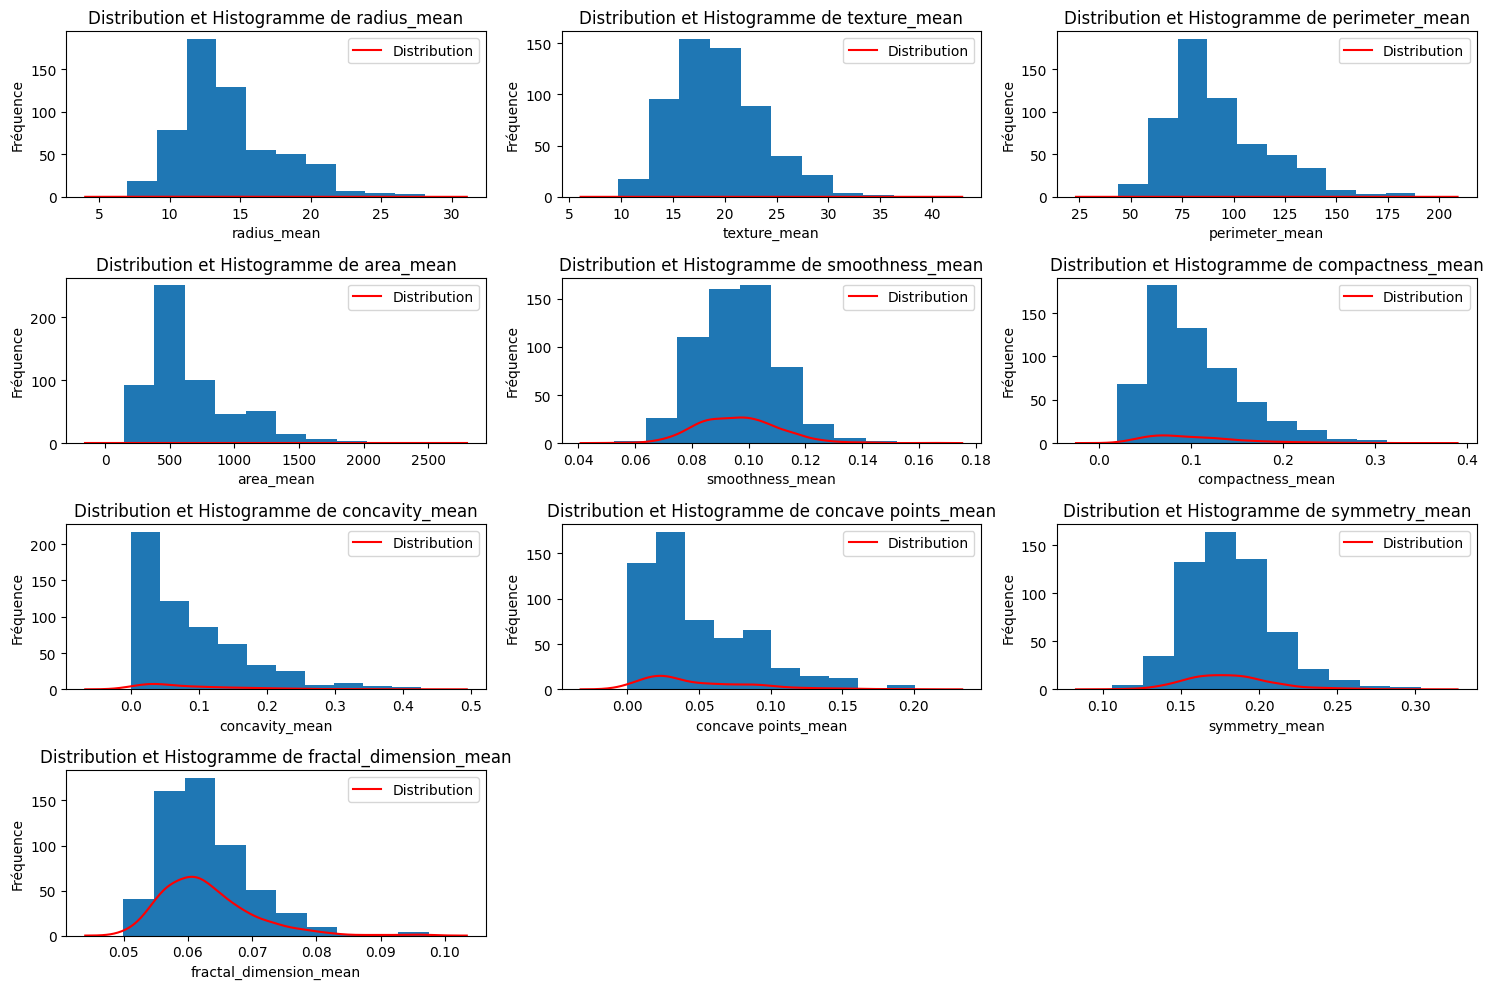

In [ ]:
# Tracer des histogrammes des variables du groupe CUT1 (_mean)
hist_mean = data_mean.hist(bins=10, figsize=(15, 10), grid=False)

# Tracer les courbes de distribution (courbes de densité) sur les histogrammes
for ax in hist_mean.flatten():
    # Obtenir le nom de la variable associée à l'axe
    var_name = ax.get_title()

    # Vérifier si la variable existe dans le DataFrame
    if var_name in data_mean.columns:
        # Tracer la courbe de distribution (courbe de densité)
        sns.kdeplot(data_mean[var_name], ax=ax, color='r', label='Distribution')

        # Ajouter des labels et une légende
        ax.set_title(f'Distribution et Histogramme de {var_name}')
        ax.set_xlabel(var_name)
        ax.set_ylabel('Fréquence')
        ax.legend()

plt.tight_layout()
plt.show()

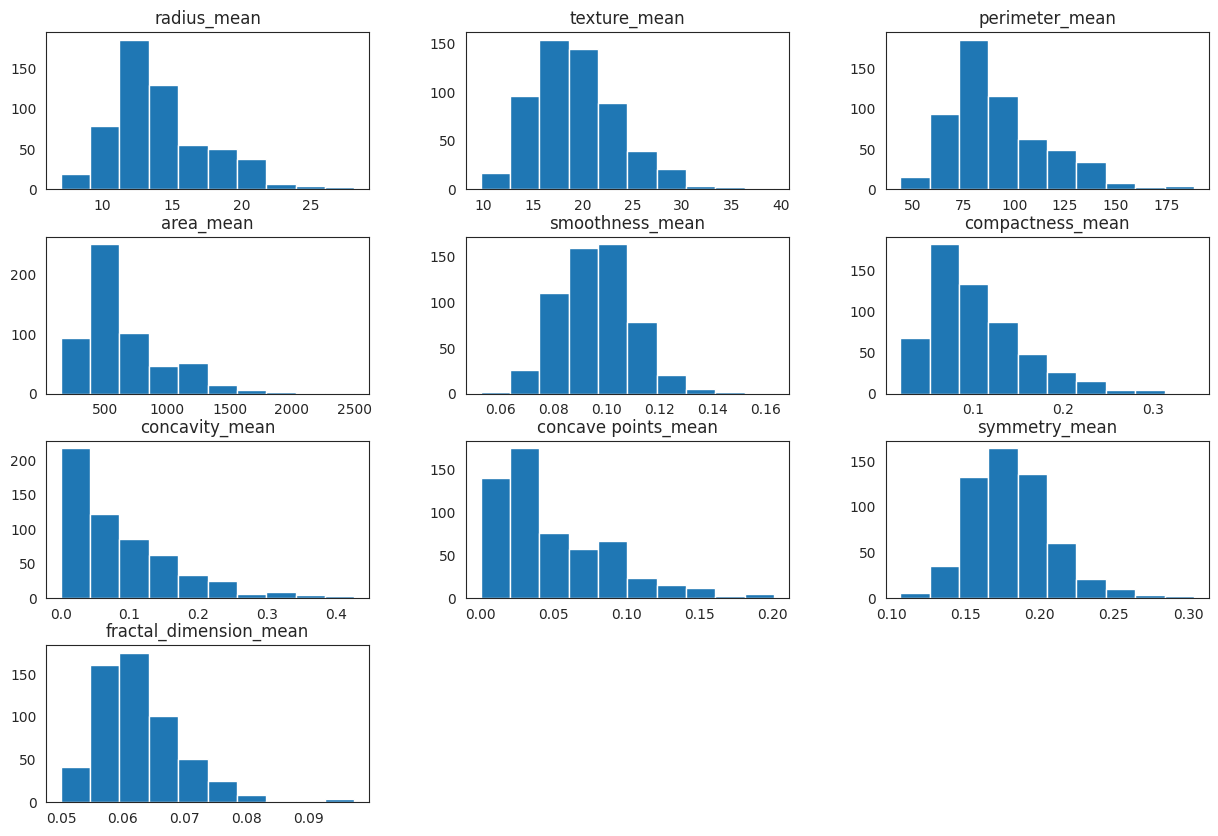

In [ ]:
# Tracer des histogrammes des variables du groupe CUT1 (_mean)
hist_mean = data_mean.hist(bins=10, figsize=(15, 10), grid=False)

# Pour tracer des histogrammes individuels, utilisez ceci :
# Par exemple, pour tracer l'histogramme de la variable 'radius_worst'
#data_mean['radius_worst'].hist(bins=100)


**Histogramme de la désignation du suffixe "_worst".**

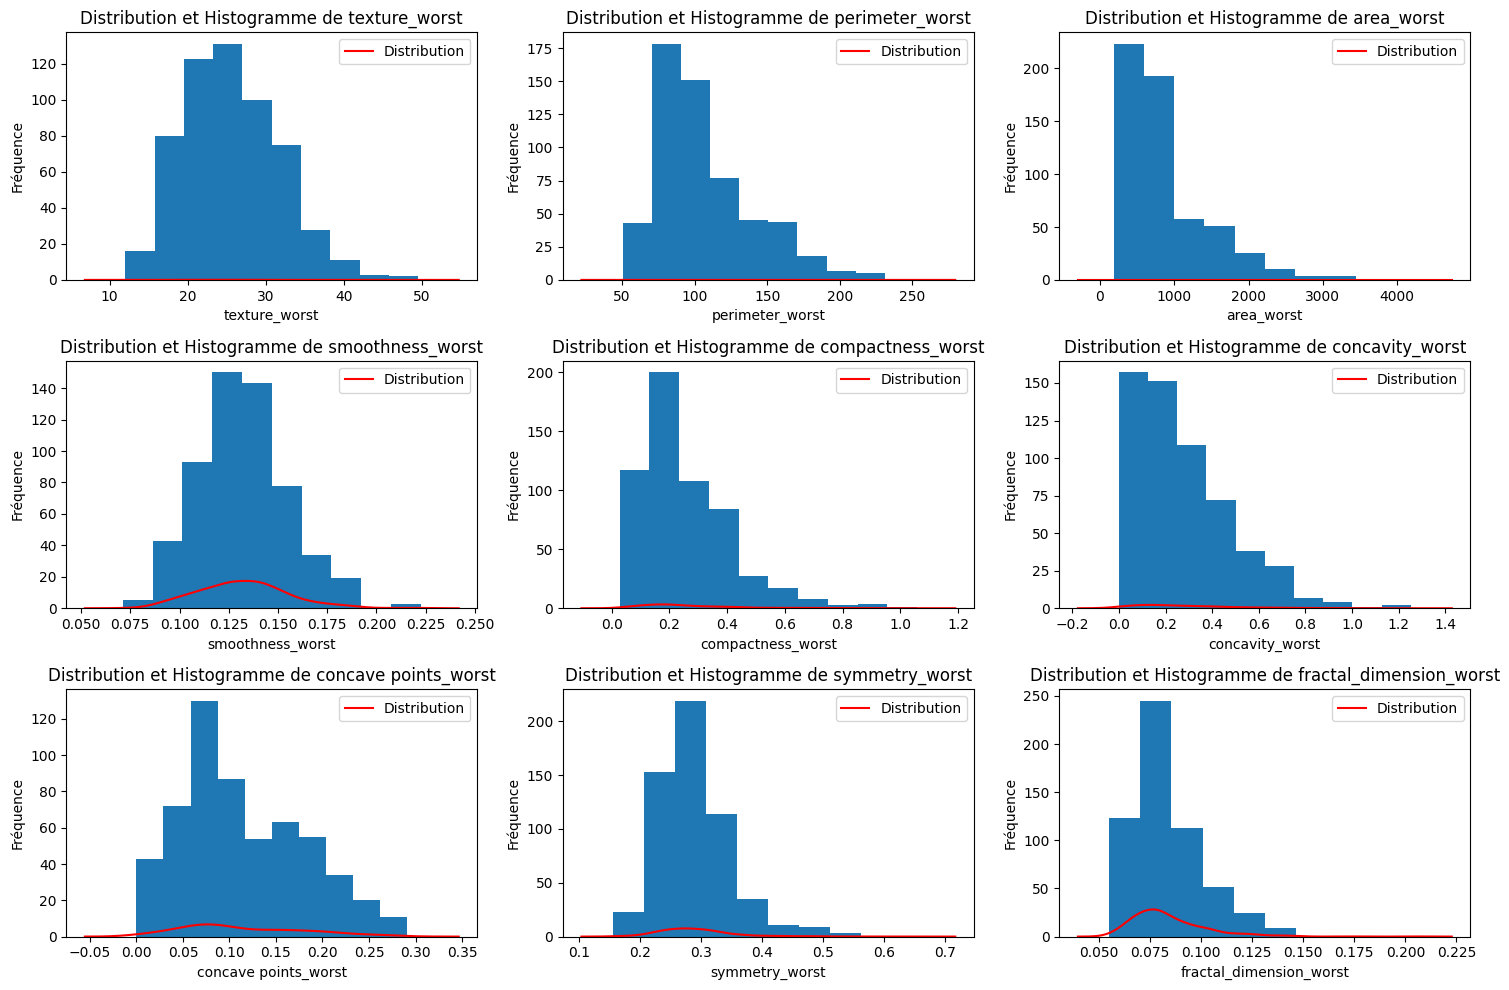

In [ ]:
# Tracer des histogrammes des variables du groupe CUT1 (_mean)
hist_worst = data_worst.hist(bins=10, figsize=(15, 10), grid=False)

# Tracer les courbes de distribution (courbes de densité) sur les histogrammes
for ax in hist_worst.flatten():
    # Obtenir le nom de la variable associée à l'axe
    var_name = ax.get_title()

    # Vérifier si la variable existe dans le DataFrame
    if var_name in data_worst.columns:
        # Tracer la courbe de distribution (courbe de densité)
        sns.kdeplot(data_worst[var_name], ax=ax, color='r', label='Distribution')

        # Ajouter des labels et une légende
        ax.set_title(f'Distribution et Histogramme de {var_name}')
        ax.set_xlabel(var_name)
        ax.set_ylabel('Fréquence')
        ax.legend()

plt.tight_layout()
plt.show()

**Histogramme de la désignation du suffixe "_se"**

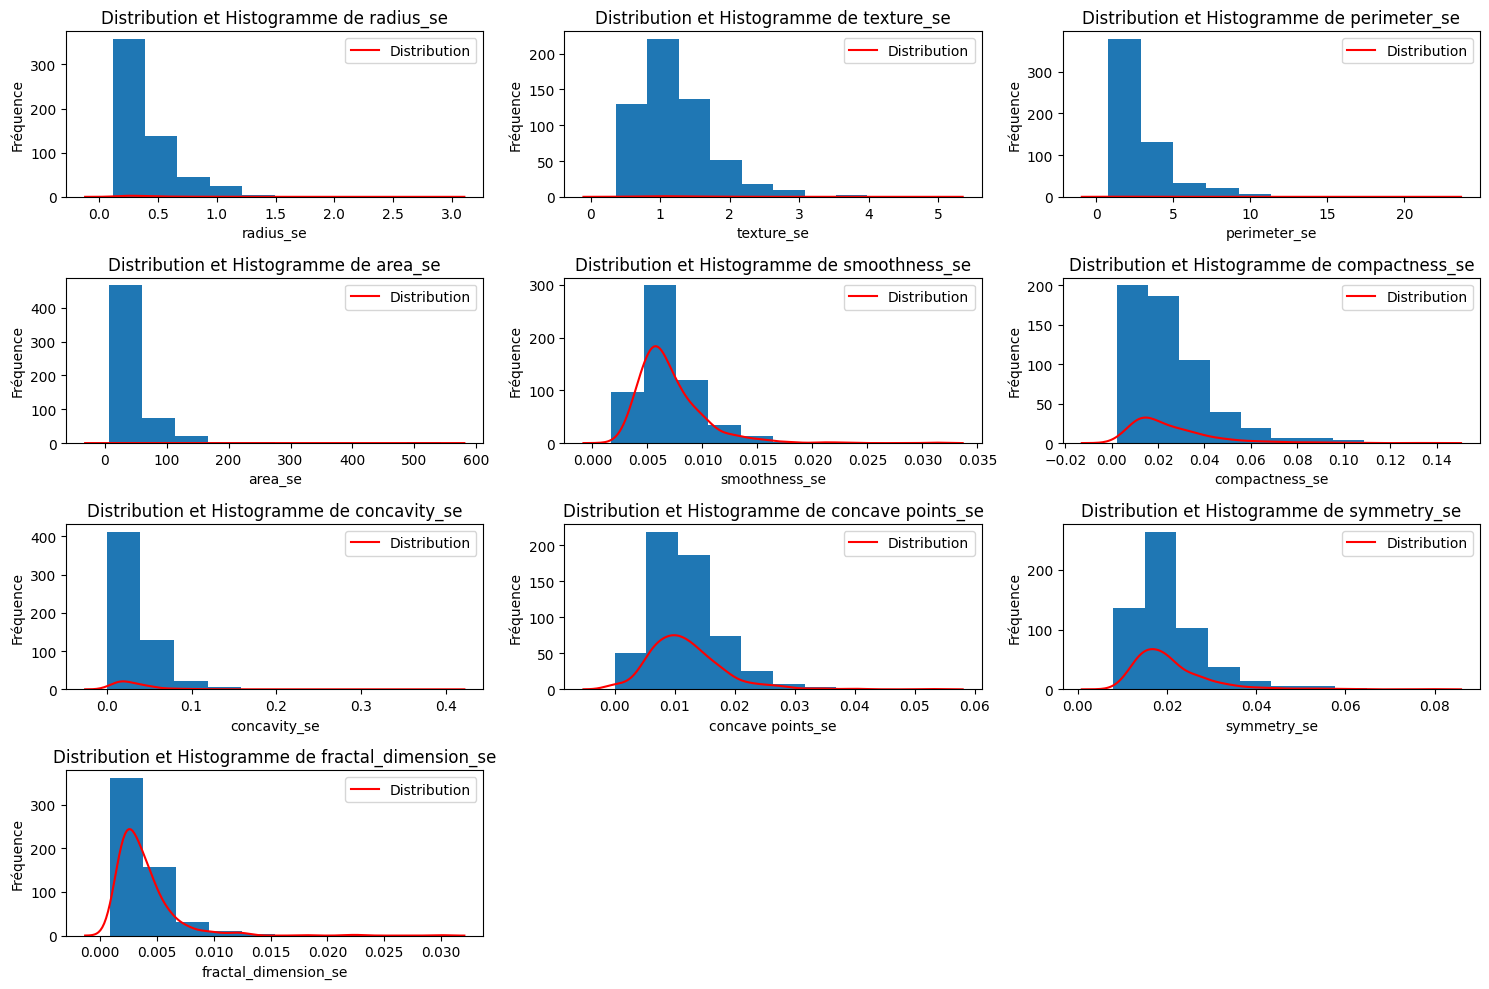

In [ ]:
# Tracer des histogrammes des variables du groupe CUT1 (_mean)
hist_se = data_se.hist(bins=10, figsize=(15, 10), grid=False)

# Tracer les courbes de distribution (courbes de densité) sur les histogrammes
for ax in hist_se.flatten():
    # Obtenir le nom de la variable associée à l'axe
    var_name = ax.get_title()

    # Vérifier si la variable existe dans le DataFrame
    if var_name in data_se.columns:
        # Tracer la courbe de distribution (courbe de densité)
        sns.kdeplot(data_se[var_name], ax=ax, color='r', label='Distribution')

        # Ajouter des labels et une légende
        ax.set_title(f'Distribution et Histogramme de {var_name}')
        ax.set_xlabel(var_name)
        ax.set_ylabel('Fréquence')
        ax.legend()

plt.tight_layout()
plt.show()

Nous pouvons constater que les attributs concavity et concavity_point peuvent avoir une distribution exponentielle ( ). Nous pouvons également constater que les attributs texture, smoothness et symmetry peuvent avoir une distribution gaussienne ou quasi gaussienne.

# 2.3.2 Visualiser la distribution des données à l'aide de diagrammes de densité

**Désignation du suffixe "_mean" pour les courbes de densité**

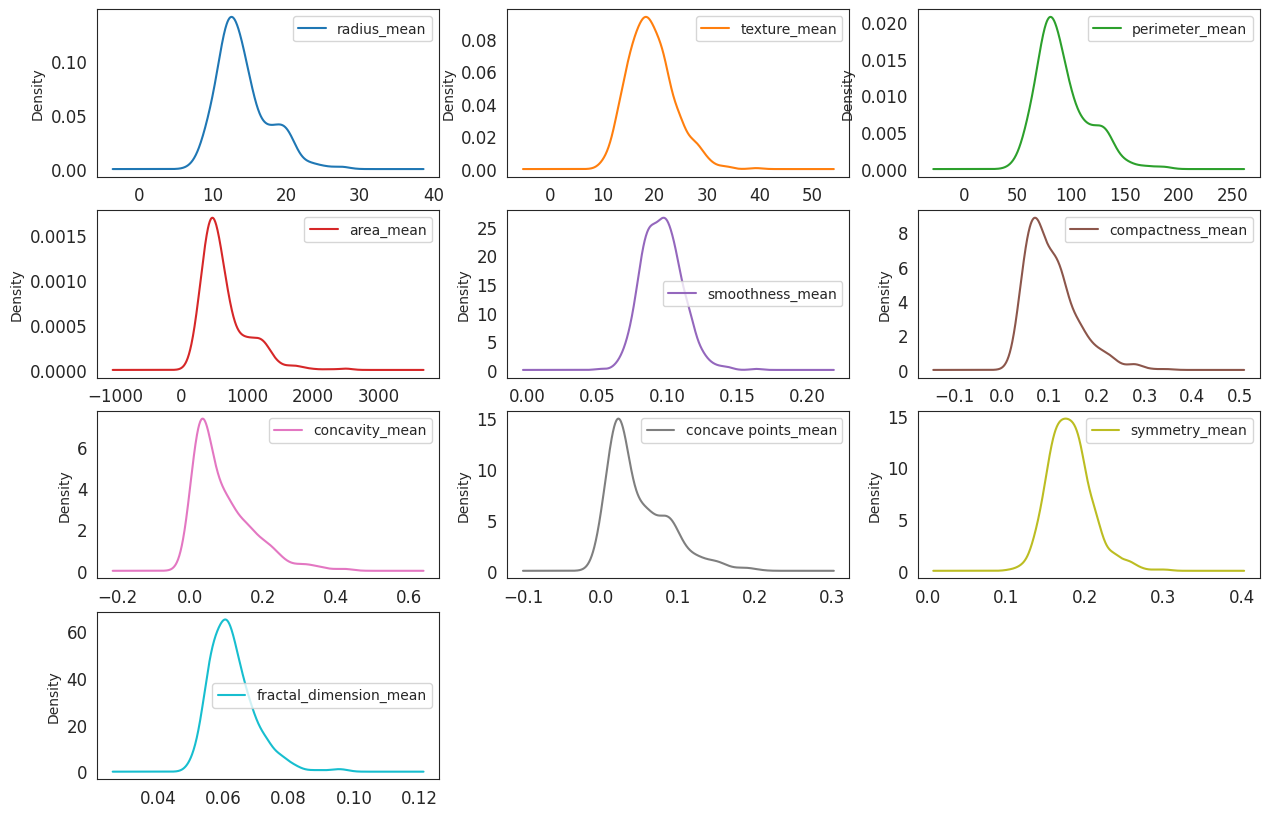

In [ ]:
# Tracer des graphiques de densité pour chaque variable du groupe CUT1 (_mean)
# Utiliser la méthode plot() avec kind='density' pour les graphiques de densité
# subplots=True indique que chaque variable aura son propre graphique
# layout=(4, 3) spécifie le nombre de lignes et de colonnes dans la disposition des graphiques
# sharex=False et sharey=False indiquent que les axes ne seront pas partagés entre les graphiques
# fontsize=12 ajuste la taille de la police
# figsize=(15, 10) contrôle la taille globale de la figure
plt = data_mean.plot(kind='density', subplots=True, layout=(4, 3), sharex=False,
                     sharey=False, fontsize=12, figsize=(15, 10))



**Désignation du suffixe "_worst" pour les courbes de densité**

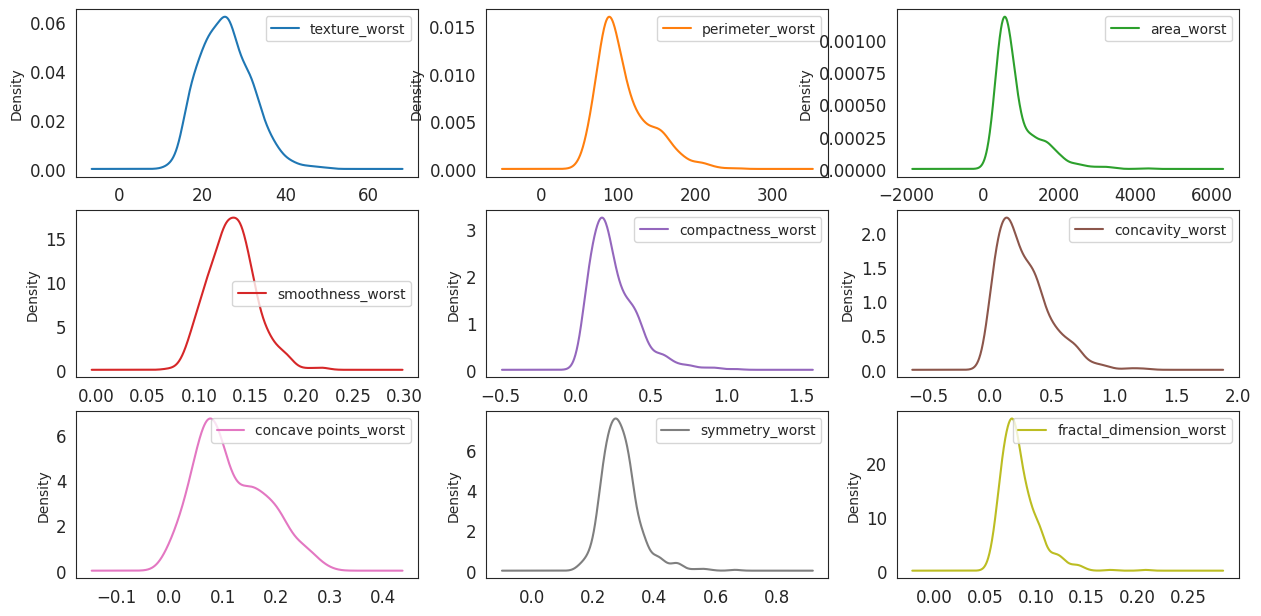

In [ ]:
plt = data_worst.plot(kind='density', subplots=True, layout=(4, 3), sharex=False,
                     sharey=False, fontsize=12, figsize=(15, 10))

**Désignation du suffixe "_se" pour les courbes de densité**

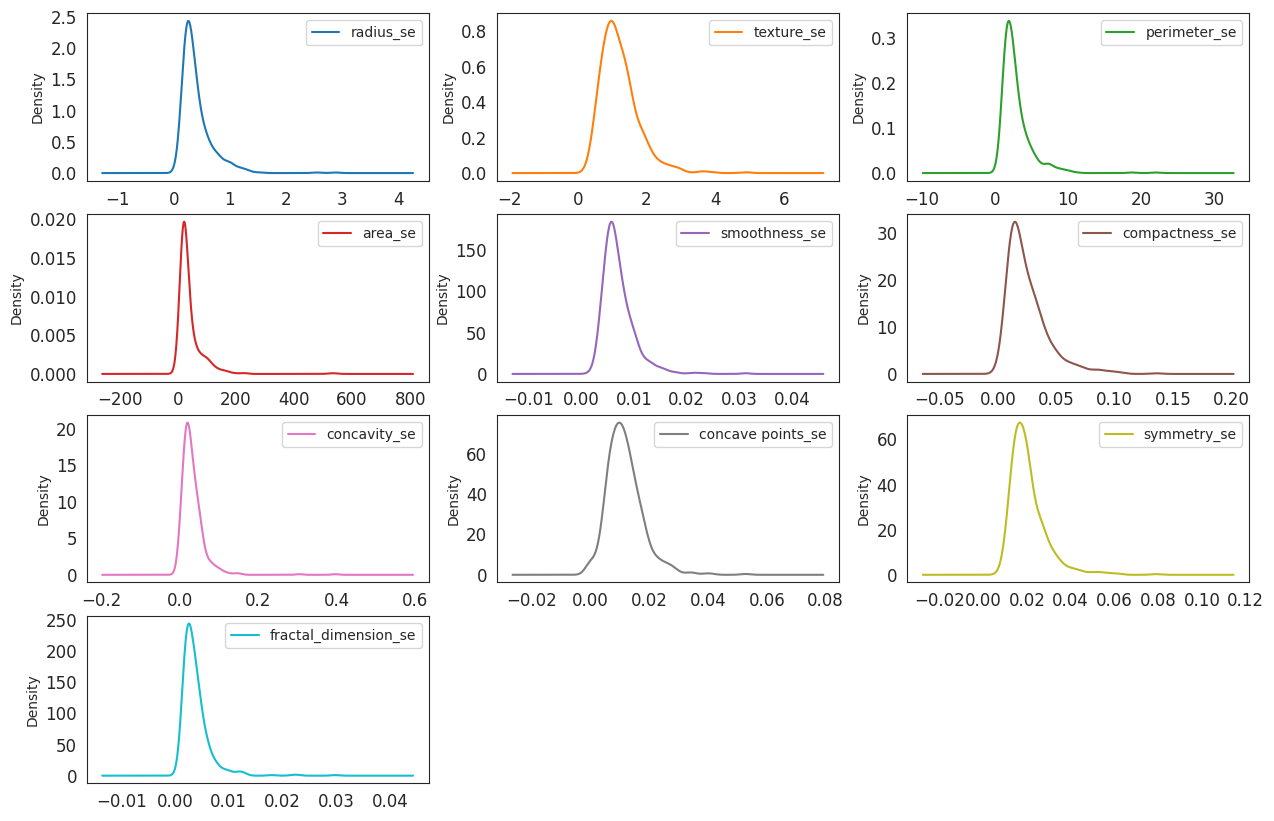

In [ ]:
plt = data_se.plot(kind='density', subplots=True, layout=(4, 3), sharex=False,
                     sharey=False, fontsize=12, figsize=(15, 10))

**Observation**

Nous pouvons constater que les attributs perimeter, radius, area, concavity, compactness peuvent avoir une distribution exponentielle ( ). Nous pouvons également constater que les attributs texture, smoothness et symmetry peuvent avoir une distribution gaussienne ou quasi gaussienne.

# 2.4 Visualisation multimodale des données

Scatter plots;
Correlation matrix

**Correlation matrix**

<ipython-input-19-4bdac7848bcd>:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: title={'center': 'Corrélation entre les Caractéristiques du Cancer du Sein'}>

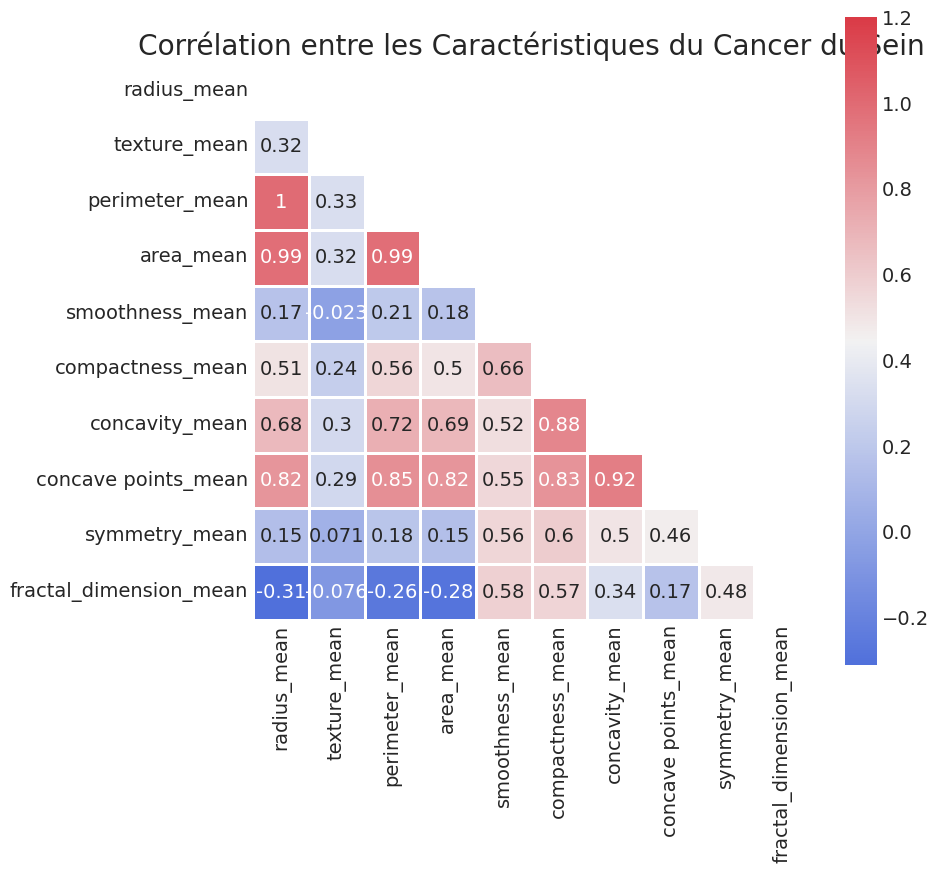

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Choisir le style de graphique
plt.style.use('fivethirtyeight')
sns.set_style("white")

# Charger les données à partir du fichier CSV nettoyé
data = pd.read_csv('data/clean-data.csv', index_col=False)
#data.drop('Unnamed: 0', axis=1, inplace=True)

# Calculer la matrice de corrélation
corr = data_mean.corr()

# Générer un masque pour le triangle supérieur
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Configurer la figure Matplotlib
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Corrélation entre les Caractéristiques du Cancer du Sein')

# Générer une palette de couleurs divergente personnalisée
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Dessiner le heatmap avec le masque et le bon rapport d'aspect
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,
            ax=ax, annot=True, fmt='.2g', linewidths=2)


Observation :
Nous pouvons voir qu'il existe une forte relation positive avec les valeurs moyennes des paramètres entre 1 et 0,75.

Le area moyenne du noyau du tissu a une forte corrélation positive avec les valeurs moyennes du radius et du perimeter ;
Certains paramètres sont modérément corrélés positivement (r entre 0,5-0,75) : concavity et area, concavity et perimeter, etc.
De même, nous observons une forte corrélation négative entre la fractal_dimension et les valeurs moyennes du radius, de la texture et des perimeter.

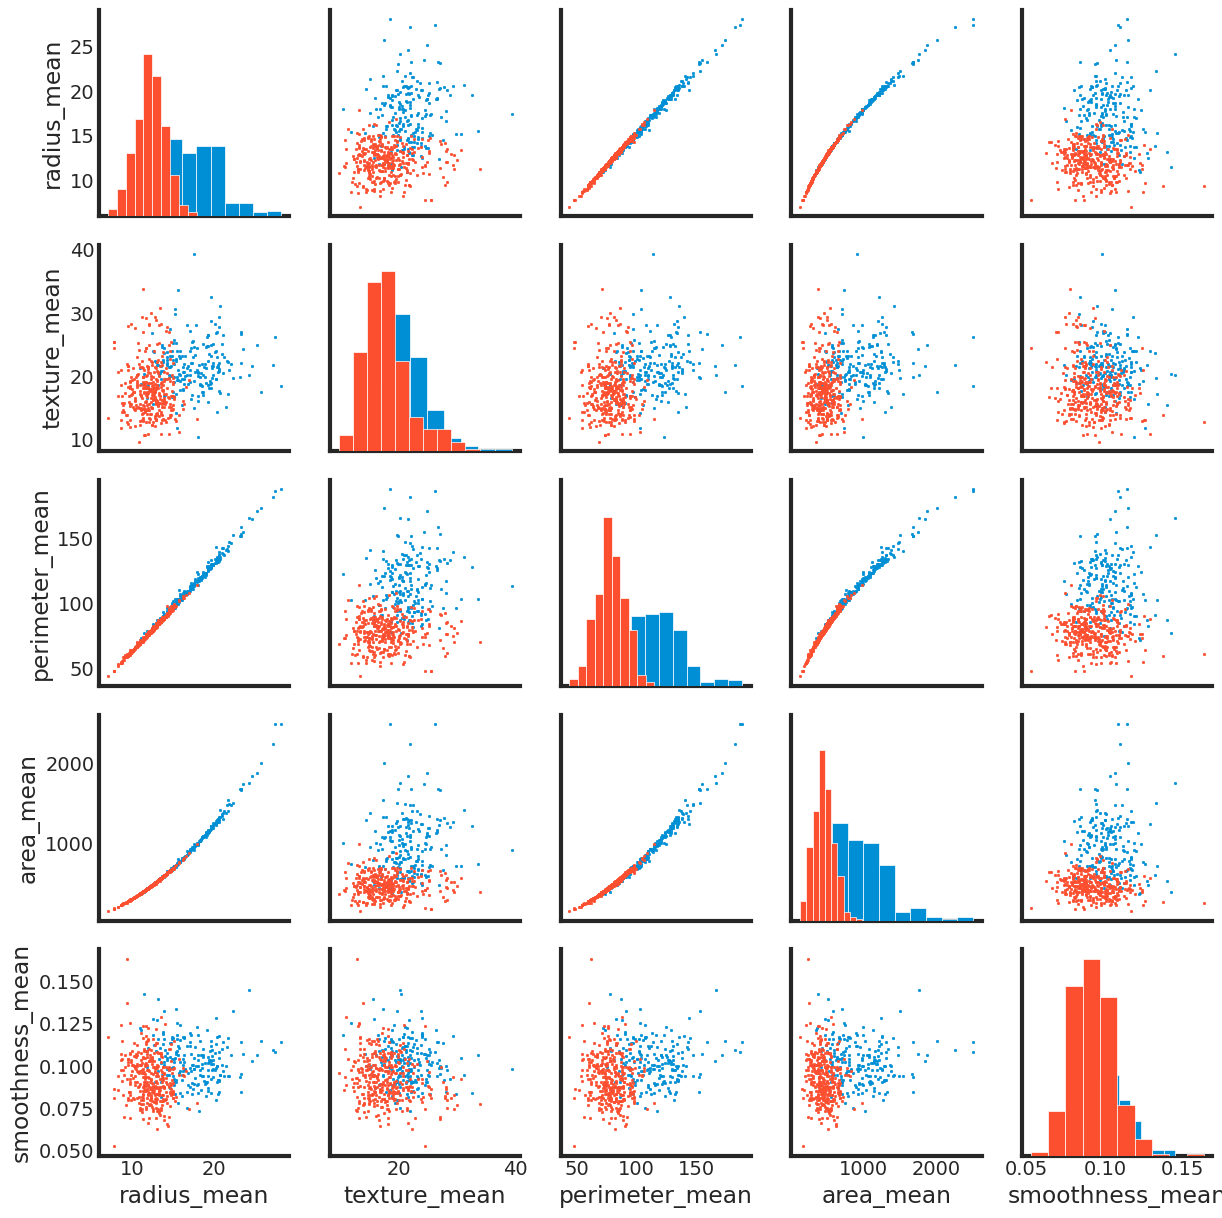

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('data.csv', index_col=False)
g = sns.PairGrid(data[[data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5],data.columns[6]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)


- Mean values de cell radius, perimeter, area, compactness, concavity and concave points peuvent être utilisés pour la classification du cancer. Des valeurs plus élevées de ces paramètres tendent à montrer une corrélation avec les tumeurs malignes.

- mean values of texture, smoothness, symmetry or fractual dimension ne montre pas de préférence particulière pour un diagnostic par rapport à l'autre.

-Dans tous les histogrammes, il n'y a pas de grandes valeurs aberrantes visibles qui justifient un nettoyage plus approfondi.

## 3- ANALYSE FACTORIELLE

**BUT:**

Trouvez les caractéristiques les plus prédictives des données et filtrez-les afin d'améliorer le pouvoir prédictif du modèle d'analyse.

**Charger les données et les bibliothèques essentielles**

In [ ]:
# Utiliser le mode d'affichage inline pour les graphiques
%matplotlib inline

# Importer la bibliothèque de visualisation matplotlib.pyplot
import matplotlib.pyplot as plt

# Importer la bibliothèque de traitement de données pandas
import pandas as pd  # traitement de données, lecture/écriture de fichiers CSV par exemple

# Importer la bibliothèque numérique numpy
import numpy as np

# Importer la distribution normale de la bibliothèque scipy.stats
from scipy.stats import norm

# Importer la bibliothèque de visualisation Seaborn
import seaborn as sns  # visualisation

# Appliquer le style de graphique "fivethirtyeight"
plt.style.use('fivethirtyeight')
sns.set_style("white")

# Configurer la taille par défaut des figures
plt.rcParams['figure.figsize'] = (8, 4)

# Charger les données à partir du fichier CSV nettoyé
data = pd.read_csv('data.csv', index_col=False)
data.drop('Unnamed: 32', axis=1, inplace=True)
data.drop('diagnosis', axis=1, inplace=True)
# Afficher les premières lignes du DataFrame (en enlevant le commentaire)
#data.head()


**Codage des étiquettes**

Ici, nous assignons les 30 caractéristiques à un tableau NumPy X, et nous transformons les étiquettes de classe de leur représentation originale sous forme de chaîne (M et B) en nombres entiers

In [ ]:
# Affecter les prédicteurs à une variable de type ndarray (matrice)
# Convertir le DataFrame 'data' en un tableau (array) de NumPy
array = data.values

# Extraire les colonnes de prédicteurs (caractéristiques) dans la variable 'X'
# Les colonnes de 1 à 30 sont extraites (index 1:31 car l'index commence à 0)
X = array[:, 1:31]

# Extraire la colonne de la variable cible (diagnostic) dans la variable 'y'
# La première colonne (index 0) est extraite
y = array[:, 0]


In [ ]:
# Transformer les étiquettes de classe de leur représentation d'origine en chaîne (M et B) en entiers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Appeler la méthode transform de LabelEncoder sur deux variables factices
#le.transform(['M', 'B'])
# Utilisation de la méthode transform sur de nouvelles données




Après avoir encodé les étiquettes de classe (diagnostic) dans un tableau y, les tumeurs malignes sont maintenant représentées par la classe 1 (c'est-à-dire la présence de cellules cancéreuses) et les tumeurs bénignes sont représentées par la classe 0 (c'est-à-dire l'absence de détection de cellules cancéreuses), respectivement, comme illustré par l'appel de la méthode de transformation de LabelEncorder sur deux variables nominales.

**Évaluation de la précision du modèle : diviser les données en ensembles d'entrainement et de test**

In [ ]:
# Importer la fonction train_test_split de scikit-learn
from sklearn.model_selection import train_test_split

# Diviser l'ensemble de données en ensembles d'entraînement (70%) et de test (30%)
# X_train contiendra les prédicteurs de l'ensemble d'entraînement
# y_train contiendra les étiquettes de classe de l'ensemble d'entraînement
# X_test contiendra les prédicteurs de l'ensemble de test
# y_test contiendra les étiquettes de classe de l'ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement (X_train) :", X_train.shape)
print("Dimensions de l'ensemble d'entraînement (y_train) :", y_train.shape)
print("Dimensions de l'ensemble de test (X_test) :", X_test.shape)
print("Dimensions de l'ensemble de test (y_test) :", y_test.shape)


Dimensions de l'ensemble d'entraînement (X_train) : (426, 30)
Dimensions de l'ensemble d'entraînement (y_train) : (426,)
Dimensions de l'ensemble de test (X_test) : (143, 30)
Dimensions de l'ensemble de test (y_test) : (143,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

**ACP**

D'après le graphique des paires , de nombreuses paires de caractéristiques divisent uniformément les données. Il est donc logique d'utiliser l'une des méthodes de réduction de la dimensionnalité pour essayer d'utiliser autant de caractéristiques que possible et de conserver autant d'informations que possible lorsque l'on travaille avec seulement 2 dimensions. On utilisera l'ACP puisque notre variable cible est catégorielle

In [ ]:
# Importer la classe PCA de scikit-learn pour l'extraction de caractéristiques
from sklearn.decomposition import PCA

# Créer une instance de PCA avec le nombre de composantes souhaitées (n_components)
pca = PCA(n_components=10)

# Appliquer PCA sur les caractéristiques normalisées (Xs)
fit = pca.fit(Xs)

# Résumer les composantes principales obtenues à partir de PCA
# Afficher les proportions de variance expliquée par chaque composante
print("Variance Expliquée : ", fit.explained_variance_ratio_)

# Afficher les vecteurs propres (composantes) de chaque composante principale

components_df = print(pd.DataFrame(fit.components_))


Variance Expliquée :  [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
         0         1         2         3         4         5         6   \
0  0.218902  0.103725  0.227537  0.220995  0.142590  0.239285  0.258400   
1 -0.233857 -0.059706 -0.215181 -0.231077  0.186113  0.151892  0.060165   
2 -0.008531  0.064550 -0.009314  0.028700 -0.104292 -0.074092  0.002734   
3  0.041409 -0.603050  0.041983  0.053434  0.159383  0.031795  0.019123   
4  0.037786 -0.049469  0.037375  0.010331 -0.365089  0.011704  0.086375   
5  0.018741 -0.032179  0.017308 -0.001888 -0.286374 -0.014131 -0.009344   
6 -0.124088  0.011400 -0.114477 -0.051653 -0.140669  0.030919 -0.107520   
7 -0.007452  0.130675 -0.018687  0.034674 -0.288975 -0.151396 -0.072827   
8 -0.223110  0.112699 -0.223739 -0.195586  0.006425 -0.167841  0.040591   
9  0.095486  0.240935  0.086385  0.074957 -0.069293  0.012936 -0.135602   

         7         8         9   ...   

**Les trois premières composantes expliquent 0.72% de la variance.**

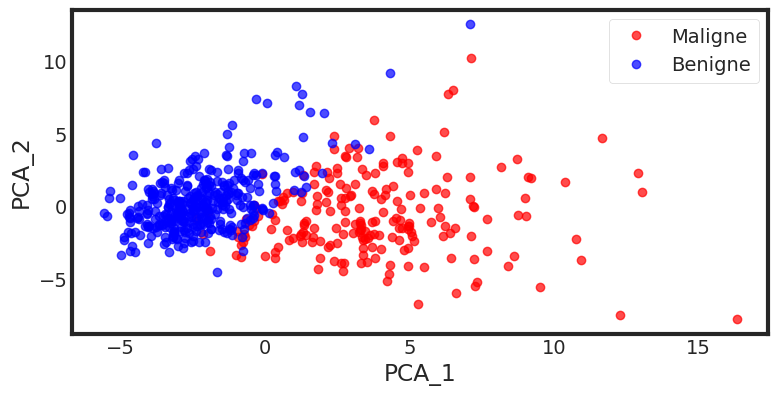

In [ ]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Maligne','Benigne'])
plt.show()

**Maintenant, ce que nous avons obtenu après avoir appliqué la transformation linéaire PCA est un sous-espace de dimension inférieure (de 3D à 2D dans ce cas), où les échantillons sont "les plus répandus" le long des nouveaux axes de caractéristiques.**

In [ ]:
# Obtenir la quantité de variance expliquée par chaque composante principale
var = pca.explained_variance_ratio_

# Variance cumulative expliquée
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
print(var1)


[44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15]


**Décider du nombre de composantes principales à retenir**

Afin de décider du nombre de composantes principales à retenir, il est courant de résumer les résultats d'une analyse des composantes principales en réalisant un diagramme de dispersion.

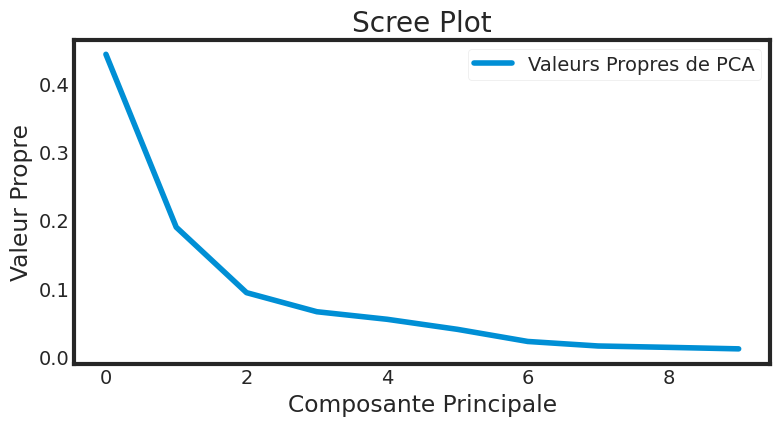

In [ ]:
# Tracer le graphe Scree Plot pour visualiser les valeurs propres (variance expliquée)
import matplotlib.pyplot as plt

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Composante Principale')
plt.ylabel('Valeur Propre')

# Ajouter une légende au graphe
leg = plt.legend(['Valeurs Propres de PCA'], loc='best', borderpad=0.3, shadow=False, markerscale=0.4)
leg.get_frame().set_alpha(0.4)

# Afficher le graphe
plt.show()


**Observation**
Le changement de pente le plus évident dans le diagramme de dispersion se produit au niveau de la composante 3, qui est le "coude" du diagramme de dispersion. Par conséquent, on peut affirmer, sur la base de ce diagramme, que les trois premières composantes devraient être conservées.

In [ ]:
df_pca = data.copy()

In [ ]:
X = df_pca.drop(['diagnosis','Unnamed: 32'], axis = 1)
y = df_pca[['diagnosis']]

In [ ]:
from scipy.stats import zscore

# Appliquer le z-score à chaque colonne de la matrice X
XScaled = zscore(X)

# Créer un DataFrame à partir de la matrice XScaled avec les mêmes noms de colonnes
XScaled_df = pd.DataFrame(XScaled, columns=data.columns[1:31])

# Afficher les premières lignes du DataFrame XScaled_df
print(XScaled_df.head())


   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        NaN     1.097064     -2.073335        1.269934   0.984375   
1        NaN     1.829821     -0.353632        1.685955   1.908708   
2        NaN     1.579888      0.456187        1.566503   1.558884   
3        NaN    -0.768909      0.253732       -0.592687  -0.764464   
4        NaN     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  fractal_dimension_se  radius_worst  texture_worst  \
0       2.217515  ...              0.907

In [ ]:
covMatrix = np.cov(XScaled.T)
print(covMatrix)


[[ 1.00176056e+00  7.47578543e-02  9.99455424e-02  7.32882137e-02
   9.70634092e-02 -1.29910288e-02  9.58695879e-05  5.01681221e-02
   4.42358387e-02 -2.21529941e-02 -5.26038973e-02  1.43299426e-01
  -7.53944072e-03  1.37572846e-01  1.78054841e-01  9.69509622e-02
   3.40207625e-02  5.53365698e-02  7.89067472e-02 -1.73367637e-02
   2.57706154e-02  8.25504171e-02  6.48334882e-02  8.01266933e-02
   1.07375232e-01  1.03562350e-02 -2.97332532e-03  2.32435938e-02
   3.52355047e-02 -4.43021125e-02 -2.99182163e-02]
 [ 7.47578543e-02  1.00176056e+00  3.24351929e-01  9.99612069e-01
   9.89095475e-01  1.70881506e-01  5.07014640e-01  6.77955036e-01
   8.23976636e-01  1.48001350e-01 -3.12179472e-01  6.80285970e-01
  -9.74887767e-02  6.75358538e-01  7.37159198e-01 -2.22992026e-01
   2.06362656e-01  1.94545531e-01  3.76831225e-01 -1.04504545e-01
  -4.27163418e-02  9.71245907e-01  2.97530545e-01  9.66835698e-01
   9.42739295e-01  1.19826732e-01  4.14190751e-01  5.27839123e-01
   7.45524434e-01  1.6424

In [ ]:

pca = PCA(n_components = 30)
pca.fit(XScaled)

PCA(n_components=30)

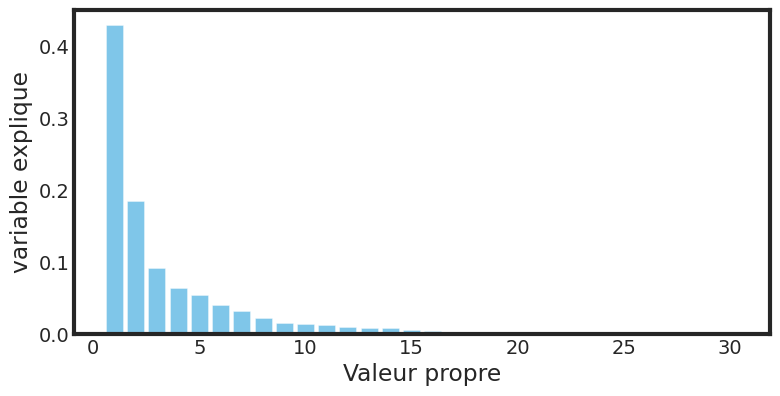

In [ ]:
plt.bar(list(range(1,31)), pca.explained_variance_ratio_, alpha = 0.5, align = 'center')
plt.ylabel('variable explique')
plt.xlabel('Valeur propre')
plt.show()

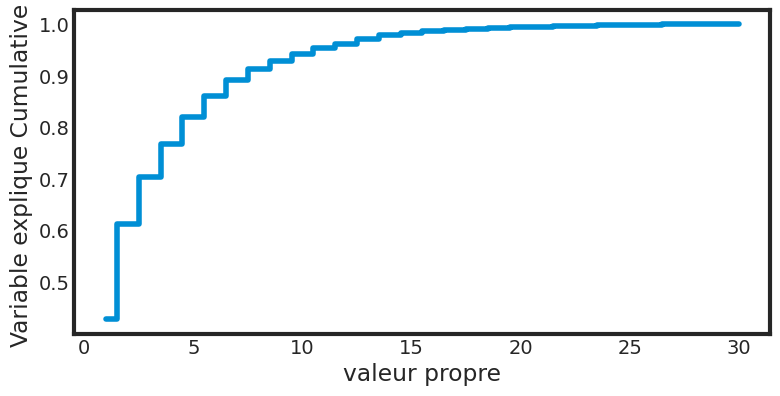

In [ ]:
plt.step(list(range(1,31)), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Variable explique Cumulative ')
plt.xlabel('valeur propre')
plt.show()

In [ ]:
pca3 = PCA(n_components = 7)
pca3.fit(XScaled)

print(pca3.components_)
print(pca3.explained_variance_)
Xpca3 = pca3.transform(XScaled)

[[ 2.29121629e-02  2.18913018e-01  1.03843884e-01  2.27534912e-01
   2.21045775e-01  1.42414707e-01  2.39067299e-01  2.58280254e-01
   2.60738114e-01  1.37977741e-01  6.41477914e-02  2.06117467e-01
   1.74133924e-02  2.11446519e-01  2.03076420e-01  1.46782102e-02
   1.70288397e-01  1.53543673e-01  1.83406751e-01  4.24155186e-02
   1.02496073e-01  2.28009352e-01  1.04515447e-01  2.36637339e-01
   2.24932135e-01  1.27824406e-01  2.09884561e-01  2.28602175e-01
   2.50746203e-01  1.22679932e-01  1.31560243e-01]
 [-3.40684907e-02 -2.33271401e-01 -6.00441986e-02 -2.14589002e-01
  -2.30668816e-01  1.86422211e-01  1.52454726e-01  6.05416253e-02
  -3.41673915e-02  1.90684979e-01  3.66531055e-01 -1.05935702e-01
   8.95477887e-02 -8.98070428e-02 -1.52771289e-01  2.03189876e-01
   2.32503362e-01  1.96846081e-01  1.29965181e-01  1.83558627e-01
   2.79584139e-01 -2.19296044e-01 -4.55012225e-02 -1.99295985e-01
  -2.18985461e-01  1.72562959e-01  1.44253637e-01  9.85265243e-02
  -7.53436735e-03  1.4261

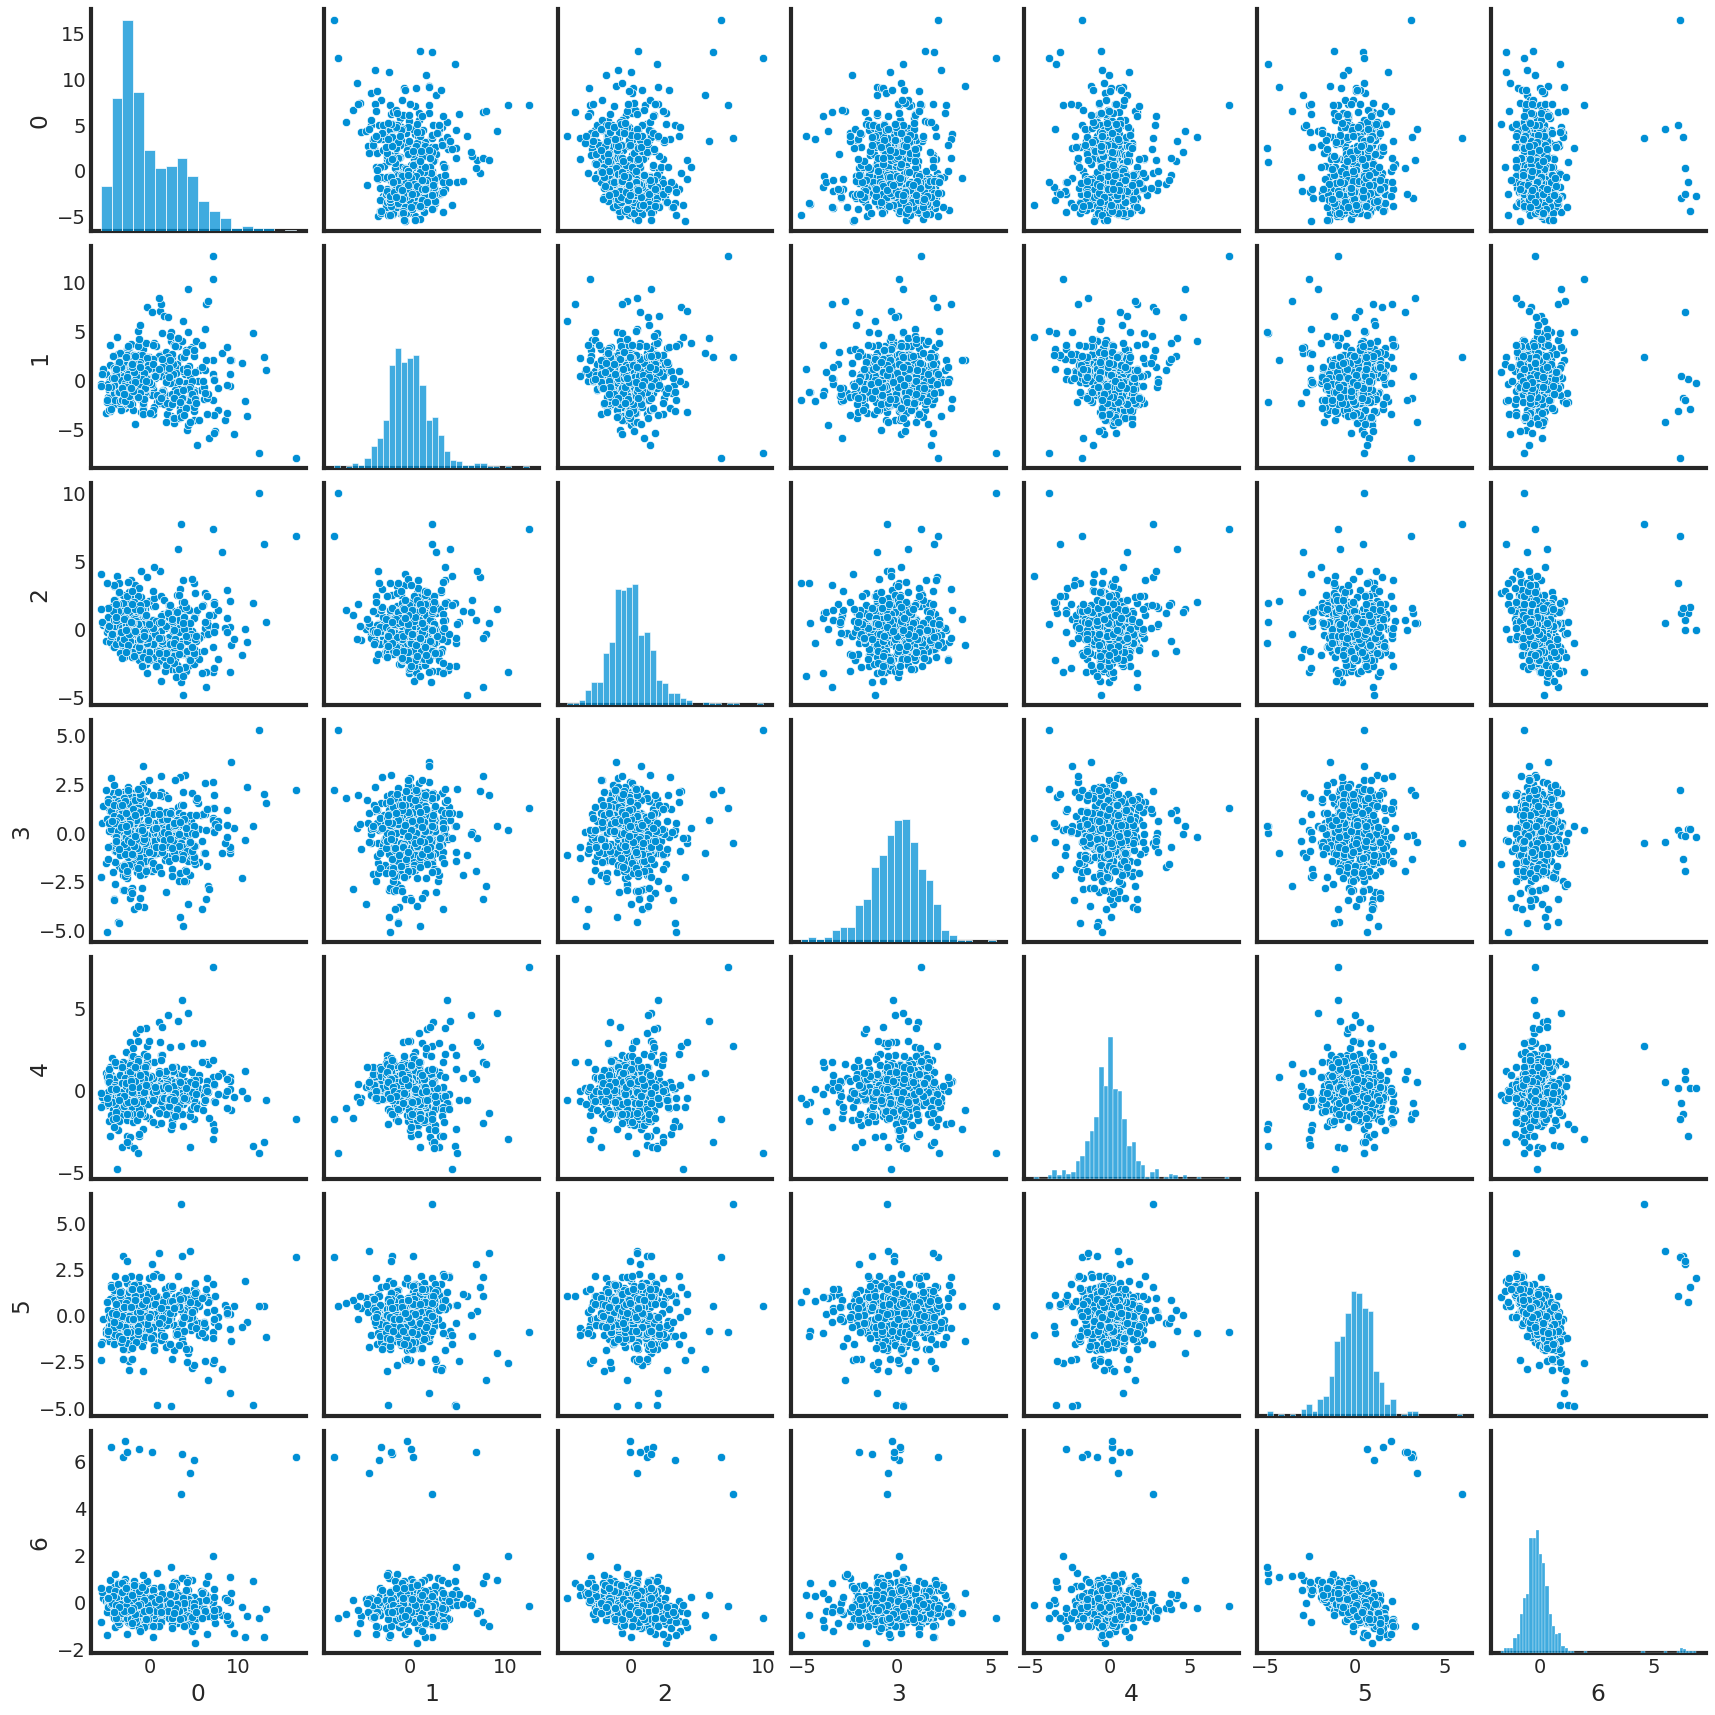

In [ ]:
sns.pairplot(pd.DataFrame(Xpca3))

In [ ]:
from imblearn.over_sampling import SMOTE

# Créer une instance de la classe SMOTE
smo = SMOTE()

# Appliquer la technique SMOTE pour suréchantillonner les données
X_balanced, Y_balanced = smo.fit_resample(Xpca3, y)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_balanced, Y_balanced, test_size = 0.3, random_state = 1)

REGRESSION LOGISTIQUE AVEC PCA





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Diviser les données réduites après PCA en ensembles d'entraînement et de test


# Créer une instance du modèle de régression logistique
model_pca = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model_pca.fit(x_train, y_train)

# Prédire les étiquettes sur les données de test
y_predict = model_pca.predict(x_test)

# Calculer les scores d'entraînement et de test
train_score = model_pca.score(x_train, y_train)
test_score = model_pca.score(x_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("LOGISTIC REGRESSION")
print("In Sample score is : ",train_score)
print('_________' * 7)
print('_________' * 7)
print("Out-sample score is : ", test_score)

LOGISTIC REGRESSION
In Sample score is :  0.9719438877755511
_______________________________________________________________
_______________________________________________________________
Out-sample score is :  0.986046511627907


KNeighborsClassifier AVEC ACP

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



# Créer une instance du modèle de classification des k plus proches voisins
model_pca_kn = KNeighborsClassifier()

# Entraîner le modèle sur les données d'entraînement
model_pca_kn.fit(x_train, y_train)

# Prédire les étiquettes sur les données de test
y_predict = model_pca_kn.predict(x_test)

# Calculer les scores d'entraînement et de test
train_score = model_pca_kn.score(x_train, y_train)
test_score = model_pca_kn.score(x_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print('KNearest Neighbours')
print("In Sample score is : ",train_score)
print('_________' * 7)
print('_________' * 7)
print("Out-sample score is : ", test_score)

KNearest Neighbours
In Sample score is :  0.9839679358717435
_______________________________________________________________
_______________________________________________________________
Out-sample score is :  0.9720930232558139


# 4 - Classification assendante hierarchique

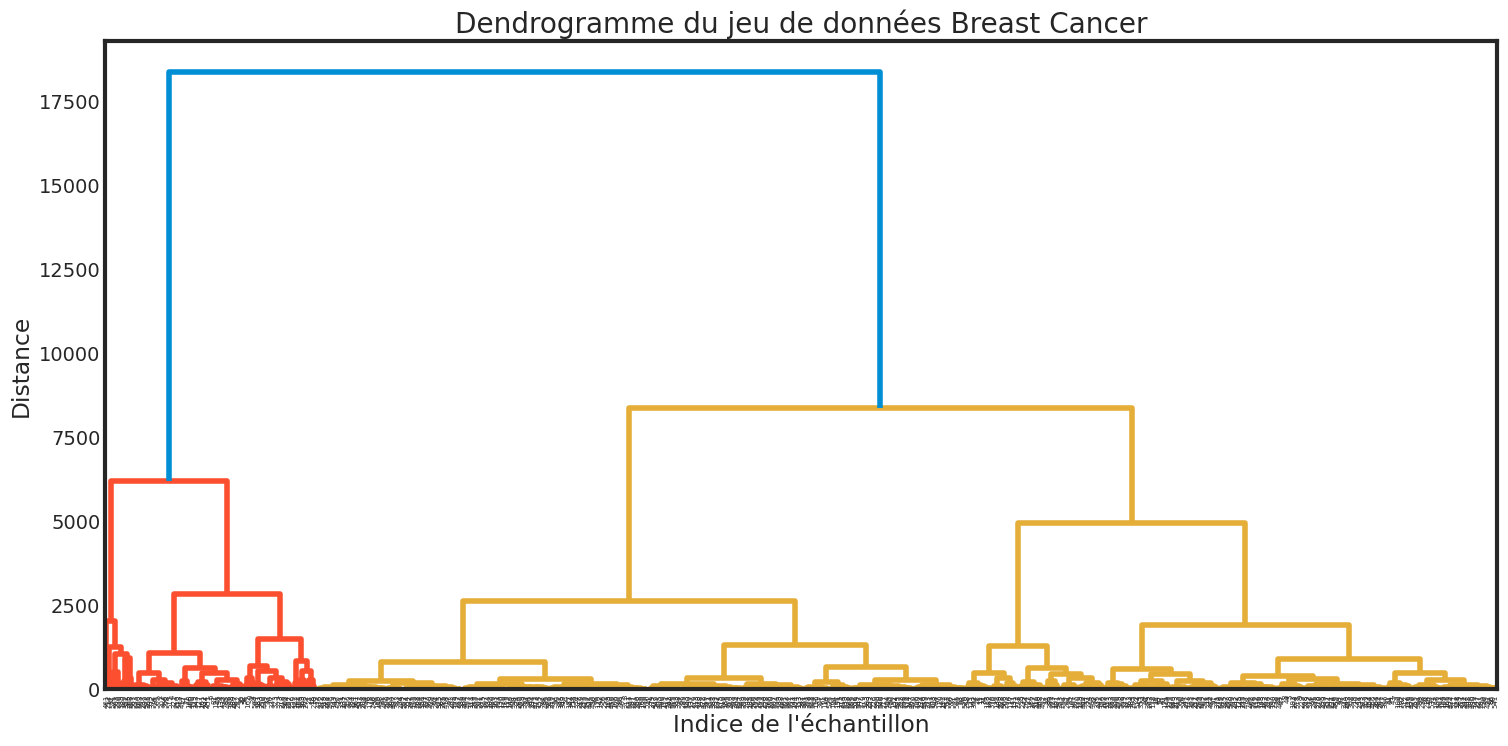

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_breast_cancer

# Charger le jeu de données Breast Cancer Wisconsin (Diagnostic)
data = load_breast_cancer()
X = data.data

# Calculer la matrice de liaison (linkage matrix) pour le regroupement hiérarchique
Z = linkage(X, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(16, 8))
dendrogram(Z)
plt.title('Dendrogramme du jeu de données Breast Cancer')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Distance')
plt.show()


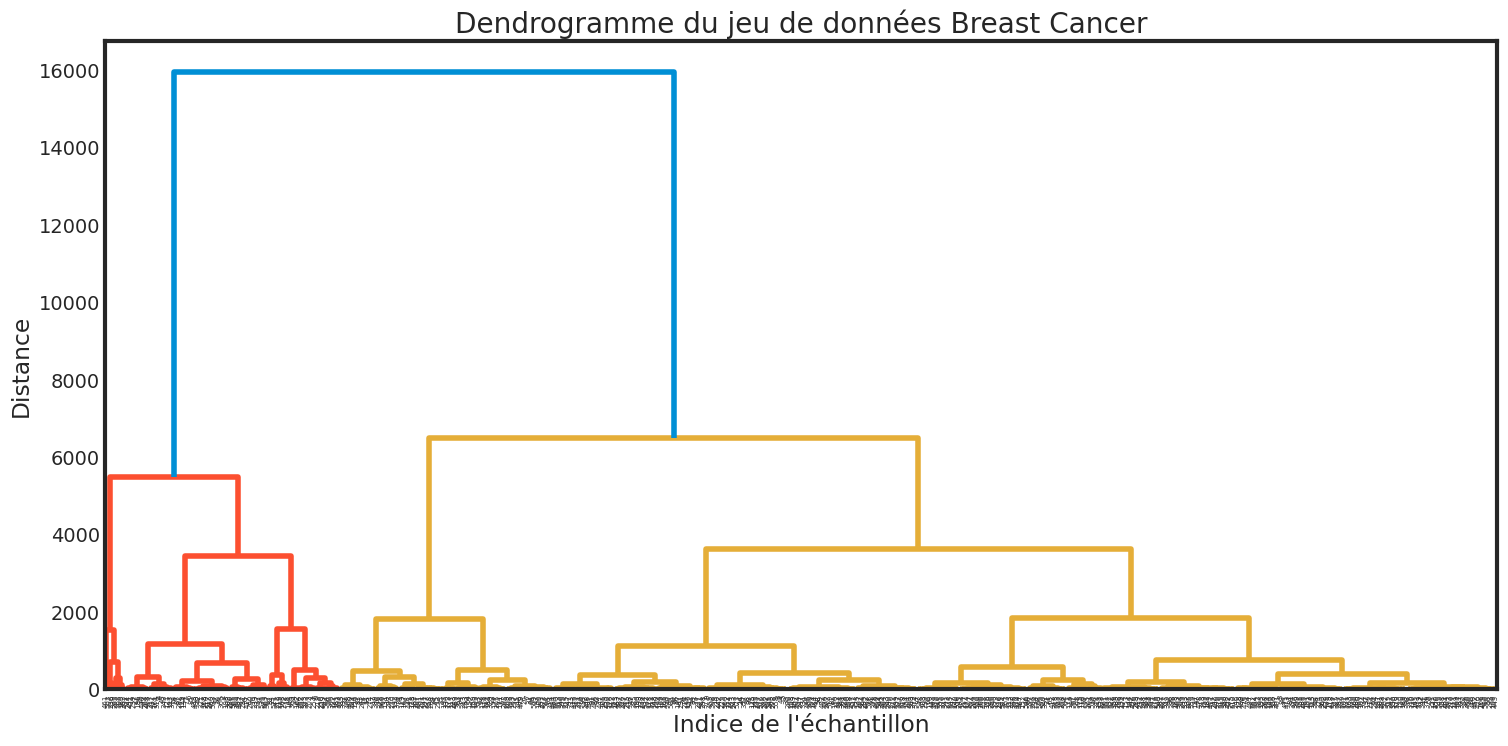

In [ ]:
# Charger le jeu de données Breast Cancer Wisconsin (Diagnostic)
data = data_worst
X = data

# Calculer la matrice de liaison (linkage matrix) pour le regroupement hiérarchique
Z = linkage(X, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(16, 8))
dendrogram(Z)
plt.title('Dendrogramme du jeu de données Breast Cancer partie worst')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Distance')
plt.show()

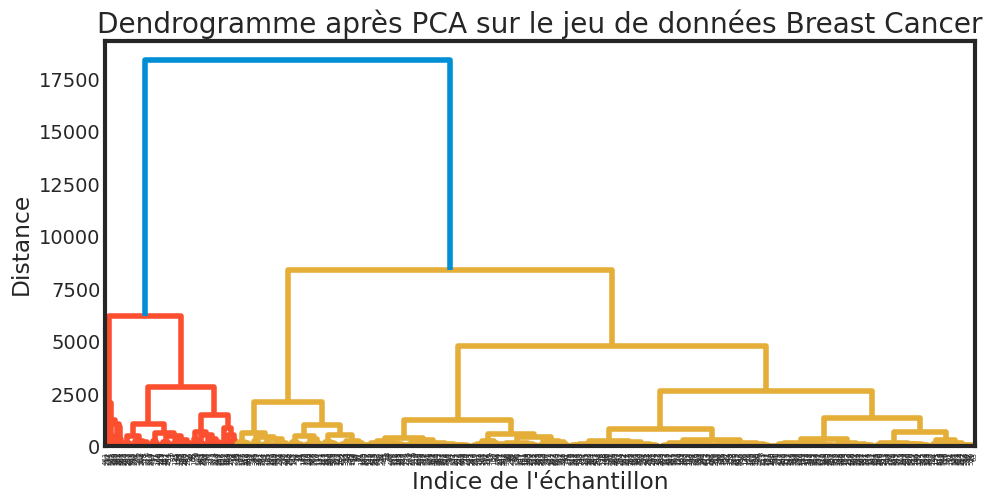

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

# Charger le jeu de données Breast Cancer Wisconsin (Diagnostic)
data = load_breast_cancer()
X = data.data

# Appliquer l'Analyse en Composantes Principales (PCA) pour réduire la dimension
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Calculer la matrice de liaison (linkage matrix) pour le regroupement hiérarchique
Z = linkage(X_pca, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogramme après PCA sur le jeu de données Breast Cancer')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Distance')
plt.show()


**si on fait une coupe horizontale dans ce dendogramme au niveau de 6500 nous pourrons constater 3 classes dans ce jeu de donnée si nous cherchons à identifier des sous-types plus fins, puisque ces deux derniers sous classe sont regroupés si nous coupons a la distance 10.000. ce qui montre les deux classes de notre ensemble de donnée.Nous voyons alors comment les attributs sont regroupés dans la prédiction de tumeur de cancer **

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


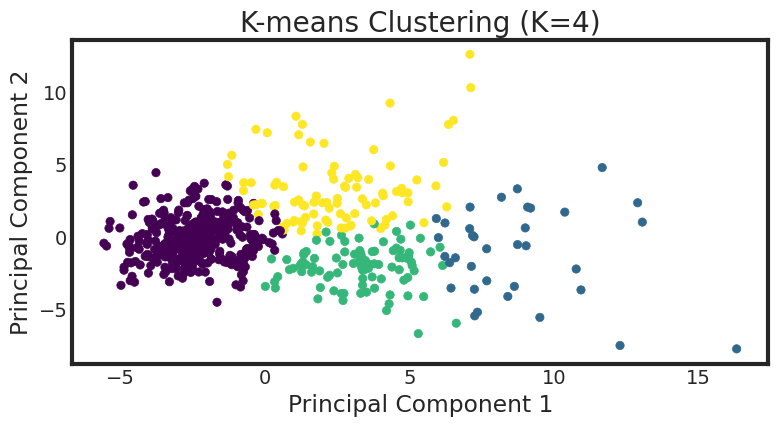

In [ ]:
from sklearn.cluster import KMeans
# Chargement du jeu de données
data = load_breast_cancer()
X = data.data

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de K-means avec un nombre de clusters choisi
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Réduction de dimension avec PCA pour la visualisation
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Visualisation des clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f"K-means Clustering (K={num_clusters})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

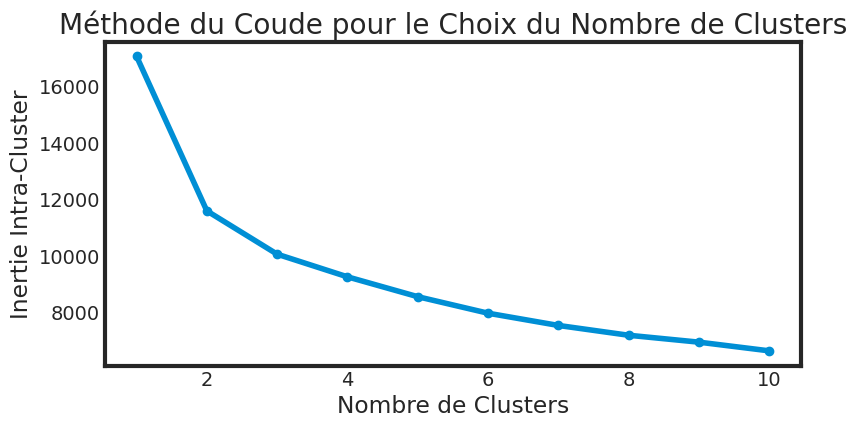

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

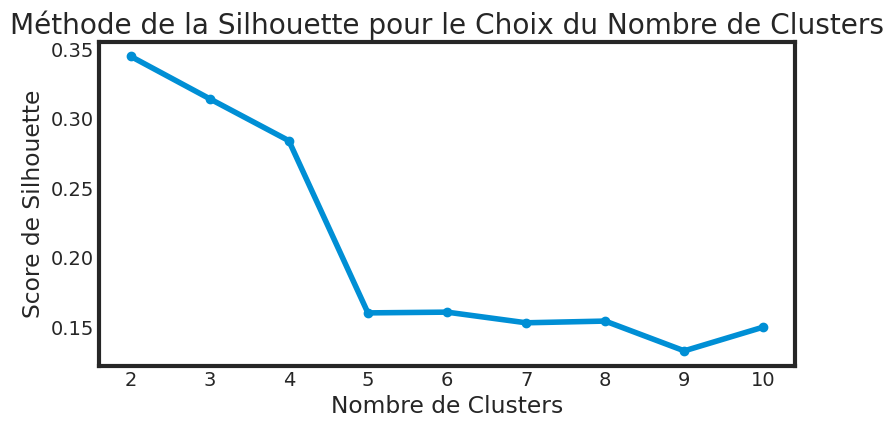

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Indice de Rand Ajusté : 0.671


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
import plotly.express as px
# Chargement du jeu de données
data = load_breast_cancer()
X = data.data

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choix du nombre optimal de clusters avec la méthode du coude
inertia_values = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Tracé du coude
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title("Méthode du Coude pour le Choix du Nombre de Clusters")
plt.xlabel("Nombre de Clusters")
plt.ylabel("Inertie Intra-Cluster")
plt.show()

# Choix du nombre optimal de clusters avec la méthode de la silhouette
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Tracé de la silhouette
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Méthode de la Silhouette pour le Choix du Nombre de Clusters")
plt.xlabel("Nombre de Clusters")
plt.ylabel("Score de Silhouette")
plt.show()

# Application de K-means avec le nombre optimal de clusters
num_clusters = 2  # Utilisons le nombre optimal de clusters déterminé
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Réduction de dimension avec PCA pour la visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Évaluation externe avec l'indice de Rand ajusté
true_labels = data.target
ari_score = adjusted_rand_score(true_labels, cluster_labels)

# Visualisation interactive avec Plotly
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = cluster_labels
fig = px.scatter(df, x='PC1', y='PC2', color='Cluster', hover_data=[cluster_labels], title=f"K-means Clustering (K={num_clusters})")
fig.show()

print(f"Indice de Rand Ajusté : {ari_score:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



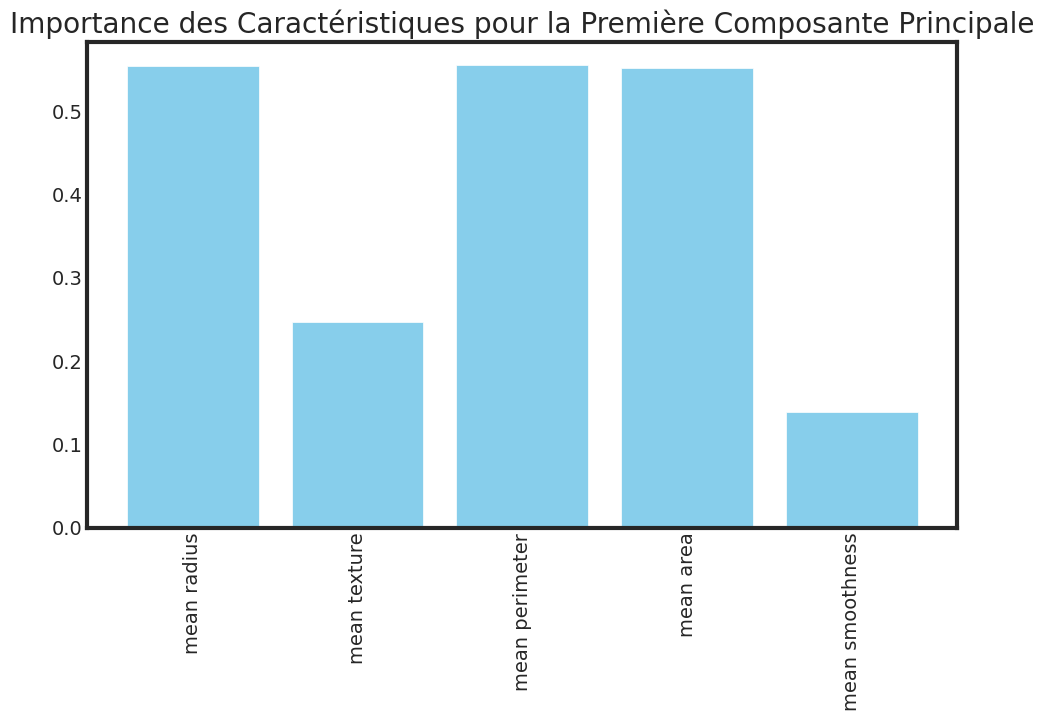

Indice de Rand Ajusté : 0.534


In [ ]:
# Sélection des caractéristiques les plus importantes (par exemple, les 5 premières)
num_features_to_keep = 5
selected_features = features[:num_features_to_keep]
X_selected = X[:, :num_features_to_keep]

# Standardisation des données sélectionnées
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Application de K-means avec le nombre optimal de clusters
num_clusters = 2  # Utilisons le nombre optimal de clusters déterminé
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Évaluation externe avec l'indice de Rand ajusté
true_labels = data.target
ari_score = adjusted_rand_score(true_labels, cluster_labels)

# Visualisation interactive avec Plotly pour t-SNE
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels
fig_pca = px.scatter(df_pca, x='PCA1', y='PCA2', color='Cluster', hover_data=[cluster_labels], title=f"PCA Clustering (K={num_clusters})")
fig_pca.show()

# Affichage des caractéristiques sélectionnées pour chaque composante
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), pca.components_[0], tick_label=selected_features, color='skyblue')
plt.title("Importance des Caractéristiques pour la Première Composante Principale")
plt.xticks(rotation=90)
plt.show()

print(f"Indice de Rand Ajusté : {ari_score:.3f}")


# 5- APPRENTISSAGE SUPERVISÉE

# **5.1-Modèle prédictif utilisant la machine à vecteur de support (SVM)**

> Bloc en retrait



L'algorithme d'apprentissage des machines à vecteurs de support (SVM) sera utilisé pour construire le modèle prédictif. Les SVM sont l'un des algorithmes de classification les plus populaires, et ont une façon élégante de transformer les données non linéaires de sorte que l'on puisse utiliser un algorithme linéaire pour ajuster un modèle linéaire aux données (Cortes et Vapnik 1995).

Les machines vectorielles de support à noyau sont des modèles puissants qui donnent de bons résultats sur un grand nombre d'ensembles de données.

Les SVM permettent de définir des limites de décision complexes, même si les données ne comportent que quelques caractéristiques.
Ils fonctionnent bien sur des données de faible ou de haute dimension (c'est-à-dire avec peu ou beaucoup de caractéristiques), mais ne s'adaptent pas très bien au nombre d'échantillons.
L'exécution d'un SVM sur des données comportant jusqu'à 10 000 échantillons peut donner de bons résultats, mais l'utilisation d'ensembles de données d'une taille de 100 000 ou plus peut devenir difficile en termes de temps d'exécution et d'utilisation de la mémoire.

Les SVM nécessitent un prétraitement minutieux des données et un réglage des paramètres. C'est pourquoi, de nos jours, la plupart des gens utilisent plutôt des modèles arborescents tels que les forêts aléatoires ou le gradient boosting (qui ne nécessitent que peu ou pas de prétraitement) dans de nombreuses applications.
Les modèles SVM sont difficiles à inspecter ; il peut être difficile de comprendre pourquoi une prédiction particulière a été faite, et il peut être délicat d'expliquer le modèle à un non-expert. **texte en gras**

**IMPORTANCE DES PARAMETRES**

Les paramètres importants des SVM à noyau sont les suivants

Le paramètre de régularisation C,
le choix du noyau (linéaire, fonction à base radiale (RBF) ou polynomial)
Les paramètres spécifiques au noyau.
gamma et C contrôlent tous deux la complexité du modèle, les valeurs élevées de l'un ou l'autre se traduisant par un modèle plus complexe. Par conséquent, les bons réglages de ces deux paramètres sont généralement fortement corrélés, et C et gamma doivent être ajustés ensemble. **texte en gras**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Importer les bibliothèques pour le traitement des données
import pandas as pd # traitement des données, E/S de fichiers CSV (par exemple, pd.read_csv)
import numpy as np
from scipy.stats import norm

## Apprentissage supervisé.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# Visualisation
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['axes.titlesize'] = 'large'



In [ ]:
data = pd.read_csv('data/clean-data.csv', index_col=False)
#data.drop('Unnamed: 0',axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Assigner les prédicteurs à une variable de type ndarray (matrice)
array = data.values
X = array[:, 1:31]  # Caractéristiques
y = array[:, 0]  # Classe

# Transformer les étiquettes de classe depuis leur représentation d'origine en chaînes (M et B) en entiers
le = LabelEncoder()
y = le.fit_transform(y)

# Normaliser les données (centrer autour de 0 et mettre à l'échelle pour éliminer la variance)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)



Classification avec validation croisée
Comme indiqué avant, il est essentiel de diviser les données en ensembles de test et d'entraînement pour éviter l'ajustement excessif. Cela permet de généraliser des données réelles, jamais vues auparavant. La validation croisée étend cette idée. Au lieu d'avoir une seule division formation/test, nous spécifions ce que l'on appelle des plis afin que les données soient divisées en plis de taille similaire.

La formation s'effectue en prenant tous les plis sauf un, appelé échantillon de réserve.

À l'issue de la formation, nous testerons les performances de votre modèle ajusté à l'aide de l'échantillon de réserve.

L'échantillon d'attente est ensuite rejeté avec le reste des autres plis, et un autre pli est extrait pour constituer le nouvel échantillon d'attente.

L'entraînement est à nouveau répété avec les autres plis et nous mesurons les performances à l'aide de l'échantillon retenu. Ce processus est répété jusqu'à ce que chaque pli ait eu la possibilité d'être un échantillon de test ou d'attente.

La performance attendue du classificateur, appelée erreur de validation croisée, est alors simplement une moyenne des taux d'erreur calculés sur chaque échantillon d'attente.

Ce processus est démontré en effectuant d'abord une division standard formation/test, puis en calculant l'erreur de validation croisée. texte en gras

In [ ]:
# 5. Diviser les enregistrements en ensembles d'entraînement et de test.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# 6. Créer un classificateur SVM et l'entraîner sur 70 % de l'ensemble de données.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# 7. Analyser la précision des prédictions sur 30 % de l'échantillon de test de réserve.
classifier_score = clf.score(X_test, y_test)
print('\nLe score de précision du classificateur est {:03.2f}\n'.format(classifier_score))





Le score de précision du classificateur est 0.95



**Pour obtenir une meilleure mesure de la précision (que nous pouvons utiliser comme indicateur de la "qualité de l'ajustement" du modèle), nous pouvons diviser successivement les données en plis que vous utiliserez pour la formation et le test :**

In [ ]:
# Obtenir la moyenne du score de validation croisée à 3 plis en utilisant un estimateur SVC.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print('\nLe score de précision de validation croisée à {} plis pour ce classificateur est {:.2f}\n'.format(n_folds, cv_error))





Le score de précision de validation croisée à 3 plis pour ce classificateur est 0.97



Les évaluations ci-dessus étaient basées sur l'utilisation de l'ensemble des caractéristiques. Nous allons maintenant utiliser la stratégie de sélection des caractéristiques basée sur la corrélation pour évaluer l'effet de l'utilisation de 3 caractéristiques qui ont la meilleure corrélation avec les étiquettes de la classe.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Créer un pipeline avec SelectKBest et SVC
clf2 = make_pipeline(SelectKBest(f_regression, k=3), SVC(probability=True))

# Calculer les scores de validation croisée
scores = cross_val_score(clf2, Xs, y, cv=3)

# Obtenir la moyenne du score de validation croisée à 3 plis en utilisant un estimateur SVC.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print('\nLe score de précision de validation croisée à {} plis pour ce classificateur est {:.2f}\n'.format(n_folds, cv_error))




Le score de précision de validation croisée à 3 plis pour ce classificateur est 0.97



In [ ]:
print (scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print ("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.93157895 0.95263158 0.94179894]
Average score and uncertainty: (94.20 +- 0.496)%


**Les résultats ci-dessus montrent que seule une fraction des caractéristiques est nécessaire pour construire un modèle dont les performances sont similaires à celles des modèles basés sur l'utilisation de l'ensemble des caractéristiques. La sélection des caractéristiques est une partie importante du processus de construction du modèle à laquelle vous devez toujours prêter une attention particulière.**

**Précision du modèle :courbe Receiver Operating Characteristic (ROC) **

Dans le domaine de la modélisation statistique et de l'apprentissage automatique, l'aire sous la courbe (AUC) est une mesure de performance couramment utilisée pour évaluer la précision d'un modèle pour les problèmes de classification binaire.

Pour comprendre les informations véhiculées par la courbe ROC, il faut considérer ce que l'on appelle la matrice de confusion, qui est essentiellement un tableau à deux dimensions où le modèle de classificateur se trouve sur un axe (vertical) et la vérité de terrain sur l'autre axe (horizontal), comme illustré ci-dessous. L'un ou l'autre de ces axes peut prendre deux valeurs (comme indiqué)

Dans une courbe ROC, on trace le "taux de vrais positifs" sur l'axe des ordonnées et le "taux de faux positifs" sur l'axe des abscisses, où les valeurs "vrai positif", "faux négatif", "faux positif" et "vrai négatif" sont des événements (ou leurs probabilités) tels que décrits ci-dessus. Les taux sont définis comme suit :

Taux de vrais positifs (ou sensibilité)} : tpr = tp / (tp + fn)
Taux de faux positifs : fpr = fp / (fp + tn)
Taux de vrais négatifs (ou spécificité) : tnr = tn / (fp + tn)

Dans toutes les définitions, le dénominateur est une marge de ligne dans la matrice de confusion ci-dessus. Ainsi, on peut exprimer

le taux de vrais positifs (tpr) comme la probabilité que le modèle dise "+" lorsque la valeur réelle est effectivement "+" (c'est-à-dire une probabilité conditionnelle). Toutefois, cela ne vous indique pas la probabilité d'avoir raison lorsque vous dites "+" (c'est-à-dire la probabilité d'un vrai positif, à condition que le résultat du test soit "+").

In [ ]:
# La matrice de confusion aide à visualiser les performances de l'algorithme.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
# Afficher la matrice de confusion
print(cm)




[[106   1]
 [  7  57]]


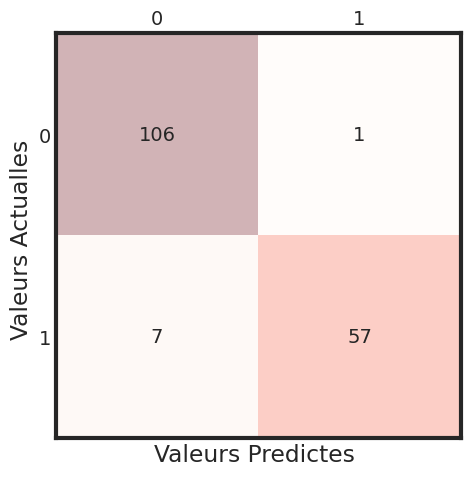

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Valeurs Predictes ', )
plt.ylabel('Valeurs Actualles ')
plt.show()
print(classification_report(y_test, y_pred ))

**Observation**
**Il existe deux classes prédites possibles : "1" et "0". Malin = 1 (indique la présence de cellules cancéreuses) et Bénin = 0 (indique l'absence).**

**Le classificateur a effectué un total de 174 prédictions (c'est-à-dire que 174 patients ont été testés pour la présence d'un cancer du sein).**
**Sur ces 174 cas, le classificateur a prédit "oui" 58 fois et "non" 113 fois.**
**En réalité, 64 patientes de l'échantillon sont atteintes de la maladie et 107 n'en sont pas atteintes**.

Vrai Positif (VP) : 57
Faux Positif (FP) : 1
Vrai Négatif (VN) : 106
Faux Négatif (FN) : 7
En utilisant ces valeurs, nous pouvons calculer les mesures de classification comme suit :

Précision (Precision) :

Précision pour la classe 0 : VP (106) / (VP (106) + FP (1)) ≈ 0.99
Précision pour la classe 1 : VP (57) / (VP (57) + FP (7)) ≈ 0.89
Rappel (Recall) :

Rappel pour la classe 0 : VP (106) / (VP (106) + FN (7)) ≈ 0.94
Rappel pour la classe 1 : VP (57) / (VP (57) + FN (1)) ≈ 0.98
F1-score :

F1-score pour la classe 0 : 2 * (Précision * Rappel) / (Précision + Rappel) ≈ 0.96
F1-score pour la classe 1 : 2 * (Précision * Rappel) / (Précision + Rappel) ≈ 0.94
Exactitude (Accuracy) : (VP (106) + VN (57)) / Total (171) ≈ 0.95

Précision Moyenne (Macro Avg) : (Précision de la classe 0 + Précision de la classe 1) / 2 ≈ 0.94

Précision Pondérée (Weighted Avg) : (Précision de la classe 0 * Nombre d'exemples de classe 0 + Précision de la classe 1 * Nombre d'exemples de classe 1) / Total ≈ 0.95

Ces valeurs fournissent une évaluation détaillée de la performance du modèle pour chaque classe et en général.






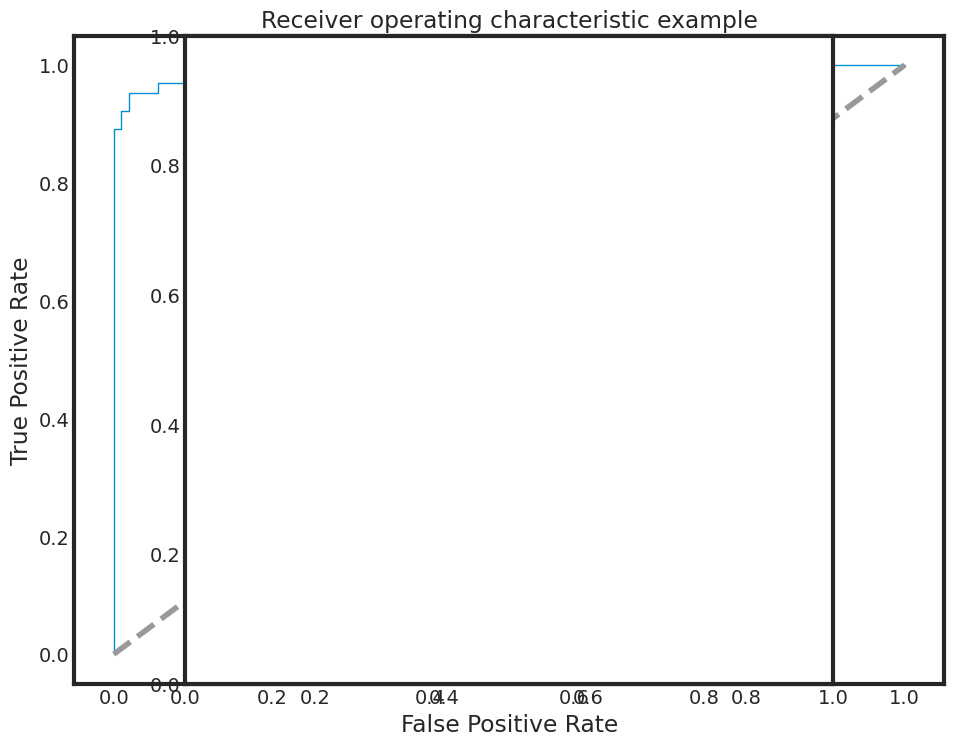

In [ ]:
from sklearn.metrics import roc_curve, auc
# Plot du receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)

Pour interpréter correctement le ROC, il faut se demander ce que représentent les points situés le long de la diagonale. Dans ces situations, il y a autant de chances que le "+" et le "-" se produisent. Par conséquent, ce n'est pas si différent de faire une prédiction en tirant à pile ou face sur une pièce de monnaie non biaisée. En d'autres termes, le modèle de classification est aléatoire.

Pour les points situés au-dessus de la diagonale, tpr > fpr, et le modèle indique que nous nous trouvons dans une zone où vos performances sont supérieures à celles du hasard. Par exemple, supposons que tpr = 0,99 et fpr = 0,01. La probabilité d'appartenir au groupe des vrais positifs est alors de (0.99/(0.99 + 0.01))= 99%
. En outre, en maintenant fpr constant, il est facile de voir que plus vous êtes positionné verticalement au-dessus de la diagonale, meilleur est le modèle de classification.

# 5.2- Optimisation du classificateur SVM

Les modèles d'apprentissage automatique sont paramétrés de manière à ce que leur comportement puisse être adapté à un problème donné. Les modèles peuvent avoir de nombreux paramètres et la recherche de la meilleure combinaison de paramètres peut être traitée comme un problème de recherche. Dans ce cas, nous cherchons à régler les paramètres du modèle de classification SVM en utilisant scikit-learn.

**Construire un modèle prédictif et l'évaluer à l'aide d'une validation croisée à 5 niveaux en utilisant des classifications SVM.**


Le score de précision du classificateur est de 0.96


Le score de précision en validation croisée à 5 plis pour ce classificateur est de 0.98



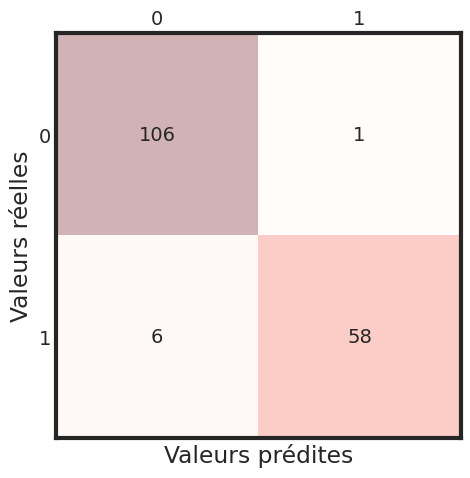

In [ ]:
# Charger les données
data = pd.read_csv('data/clean-data.csv', index_col=False)
#data.drop('Unnamed: 0', axis=1, inplace=True)

# Assigner les prédicteurs à une variable de type ndarray (matrice)
array = data.values
X = array[:, 1:31]
y = array[:, 0]

# Transformer les étiquettes de classe de leur représentation originale en chaîne (M et B) en entiers
le = LabelEncoder()
y = le.fit_transform(y)

# Normaliser les données (centrer autour de 0 et mettre à l'échelle pour supprimer la variance).
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Réduction de dimension avec PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(Xs)

# Séparation des enregistrements en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2, stratify=y)

# Création et entraînement d'un classificateur SVM
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyse de la précision des prédictions sur l'échantillon de test
classifier_score = clf.score(X_test, y_test)
print('\nLe score de précision du classificateur est de {:03.2f}\n'.format(classifier_score))

# Création d'un pipeline pour la sélection des meilleures caractéristiques et l'entraînement du classificateur
clf2 = make_pipeline(SelectKBest(f_regression, k=3), SVC(probability=True))
scores = cross_val_score(clf2, X_pca, y, cv=3)

# Calcul de la moyenne des scores de validation croisée à 5 plis en utilisant un estimateur SVC
n_folds = 5
cv_error = np.average(cross_val_score(SVC(), X_pca, y, cv=n_folds))
print('\nLe score de précision en validation croisée à {} plis pour ce classificateur est de {:.2f}\n'.format(n_folds, cv_error))

# Prédiction sur l'ensemble de test
y_pred = clf.fit(X_train, y_train).predict(X_test)

# Matrice de confusion
cm = metrics.confusion_matrix(y_test, y_pred)

# Rapport de classification
classification_rep = classification_report(y_test, y_pred)

# Affichage de la matrice de confusion
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.show()

**Importance de l'optimisation**

Nous pouvons régler deux paramètres clés de l'algorithme SVM :

la valeur de C (degré de relâchement de la marge)
et le type de noyau.
Par défaut, les SVM (classe SVC) utilisent le noyau RBF (Radial Basis Function) avec une valeur C fixée à 1,0. Comme pour KNN, nous effectuerons une recherche de grille en utilisant la validation croisée 10 fois avec une copie standardisée de l'ensemble de données d'apprentissage. Nous essaierons un certain nombre de types de noyaux plus simples et de valeurs C avec moins de biais et plus de biais (moins et plus de 1,0 respectivement).

Python scikit-learn fournit deux méthodes simples pour le réglage des paramètres de l'algorithme :

Réglage des paramètres de la recherche en grille.
Réglage des paramètres de la recherche aléatoire.

In [ ]:
# entrainement
from sklearn.model_selection import GridSearchCV

kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
# Afficher les meilleurs paramètres trouvés ainsi que le score associé
print("Les meilleurs paramètres sont %s avec un score de %0.2f"
      % (grid.best_params_, grid.best_score_))

Les meilleurs paramètres sont {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'} avec un score de 0.98


In [ ]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



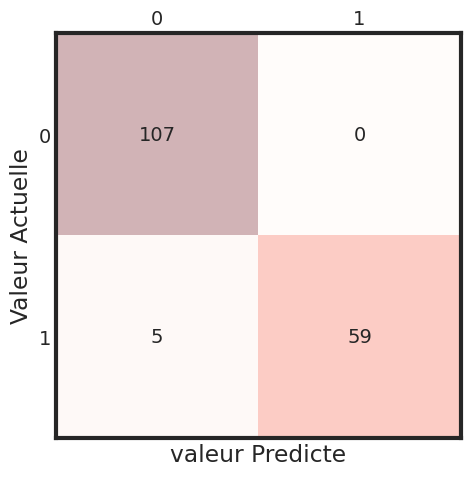

In [ ]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('valeur Predicte', )
plt.ylabel('Valeur Actuelle')
plt.show()

5.3-COMPARAISONS AVEC D'AUTRES CLASSIFICATEURS

Dans un projet d'apprentissage automatique, il existe des flux de travail standard qui peuvent être automatisés. Dans Python scikit-learn, les pipelines permettent de définir clairement et d'automatiser ces flux de travail.

Les pipelines aident à surmonter les problèmes courants tels que les fuites de données de test.
Python scikit-learn fournit un utilitaire Pipeline pour aider à automatiser les flux de travail d'apprentissage automatique.
Les pipelines permettent d'enchaîner une séquence linéaire de transformations de données pour aboutir à un processus de modélisation qui peut être évalué.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold  # Utiliser model_selection à la place de cross_validation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Importer les bibliothèques de visualisation
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8, 4)




Nous allons évaluer quelques algorithmes
Il est maintenant temps de créer des modèles de données et d'évaluer leur précision sur des données inédites. Voici ce que nous allons couvrir dans cette étape :

Séparer un ensemble de données de validation.
Configurer le harnais de test pour utiliser la validation croisée 10 fois.
Construire 5 modèles différents
Sélectionner le meilleur modèle

**Données de validation**

In [ ]:
# Charger les données
data = pd.read_csv('data/clean-data.csv', index_col=False)
#data.drop('Unnamed: 0', axis=1, inplace=True)

# Séparer le jeu de données en caractéristiques (X) et étiquettes de classe (y)
array = data.values
X = array[:, 1:31]  # Sélectionner les colonnes de caractéristiques
y = array[:, 0]  # Sélectionner la colonne d'étiquettes de classe

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Transformer les étiquettes de classe de leur représentation originale en chaînes (M et B) en entiers
le = LabelEncoder()
y = le.fit_transform(y)


**EVALUATION**

In [ ]:

# Créer une liste de modèles à évaluer
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Options de test et métrique d'évaluation
num_folds = 10
scoring = 'accuracy'

# Initialiser les listes pour stocker les résultats et les noms des modèles
results = []
names = []

# Boucle à travers chaque modèle
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # Afficher les résultats moyens et l'écart type pour chaque modèle
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Afficher le score de précision en cross-validation à 10 volets pour les six classificateurs
print('-> Score de précision en cross-validation à 10 volets pour les six classificateurs sur les données d\'entraînement')



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.947244 (0.039764)
LDA: 0.959679 (0.023269)
KNN: 0.921923 (0.051367)
CART: 0.919551 (0.031578)
NB: 0.932115 (0.037598)
SVM: 0.899423 (0.046705)
-> Score de précision en cross-validation à 10 volets pour les six classificateurs sur les données d'entraînement


**OBSERVATION**

Les résultats suggèrent que la régression logistique et la LDA méritent d'être étudiées plus en détail. Il ne s'agit que des valeurs moyennes de précision. Il est toujours judicieux d'examiner la distribution des valeurs de précision calculées à travers les plis de validation croisée. Nous pouvons le faire graphiquement à l'aide de diagrammes en boîte et de diagrammes à moustaches.

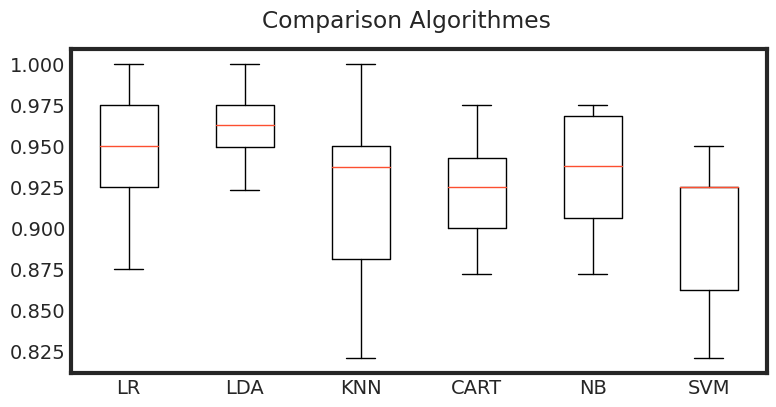

In [ ]:
# Comparons les Algorithmes
fig = plt.figure()
fig.suptitle( 'Comparison Algorithmes' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Observation**

Les résultats montrent une distribution serrée presque similaire pour tous les classificateurs, à l'exception du SVM, ce qui est encourageant, car cela suggère une faible variance. Les mauvais résultats du SVM sont surprenants.

Il est possible que la distribution variée des attributs ait un effet sur la précision d'algorithmes tels que le SVM. Dans la section suivante, nous répéterons cette vérification ponctuelle avec une copie standardisée de l'ensemble de données d'apprentissage.

**Évaluer les algorithmes : Normaliser les données**

In [ ]:
# Standardisation du jeu de données
pipelines = []

# Créer des pipelines pour chaque modèle avec mise à l'échelle
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

# Initialiser les listes pour stocker les résultats et les noms des modèles
results = []
names = []

# Boucle à travers chaque pipeline
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # Afficher les résultats moyens et l'écart type pour chaque modèle
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.974936 (0.015813)
ScaledLDA: 0.954744 (0.018784)
ScaledKNN: 0.957372 (0.033665)
ScaledCART: 0.927179 (0.039394)
ScaledNB: 0.937115 (0.039261)
ScaledSVM: 0.967436 (0.027483)


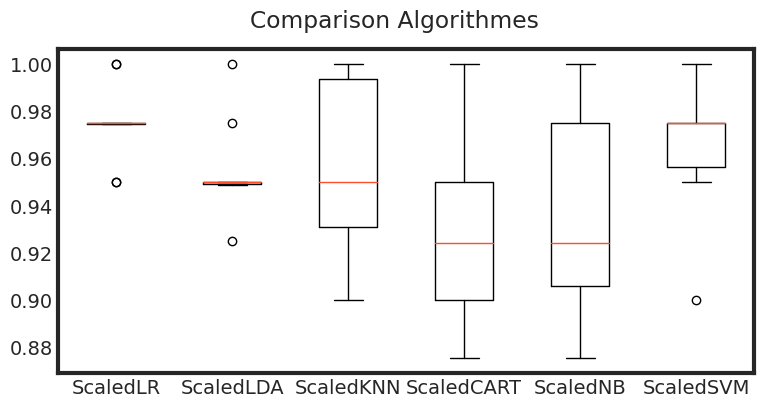

In [ ]:
# Comparons les Algorithmes
fig = plt.figure()
fig.suptitle( 'Comparison Algorithmes' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# 5.3- Réglage des hyperparamètres - Hyperparamètres k-NN

Pour votre implémentation k-NN standard, il y a deux hyperparamètres principaux que nous voudrons régler :

Le nombre de voisins k.
La métrique de distance/fonction de similarité.
Ces deux valeurs peuvent avoir un impact considérable sur la précision de votre classificateur k-NN. L'objet Grid est prêt à effectuer une validation croisée 10 fois sur un modèle KNN en utilisant la précision de la classification comme métrique d'évaluation En outre, il y a une grille de paramètres pour répéter le processus de validation croisée 10 fois 30 fois Chaque fois, le paramètre n_neighbors doit recevoir une valeur différente de la liste Nous ne pouvons pas donner à GridSearchCV juste une liste Nous devons spécifier que n_neighbors doit prendre de 1 à 30 Vous pouvez définir n_jobs = -1 pour exécuter les calculs en parallèle (si cela est supporté par votre ordinateur et votre système d'exploitation)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

# Création du pipeline pour le classifieur KNN
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', KNN())])

# Entraîner le pipeline sur les données d'entraînement
pipe_knn.fit(X_train, y_train)

# Évaluer les performances du modèle avec une validation croisée
scores = cross_val_score(estimator=pipe_knn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('--> Précision de l\'entraînement du modèle : %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# Optimiser les hyperparamètres à l'aide de la validation croisée
param_range = range(1, 31)
param_grid = [{'clf__n_neighbors': param_range}]
# Instancier la grille de recherche
grid = GridSearchCV(estimator=pipe_knn,
                    param_grid=param_grid,
                    cv=10,
                    scoring='accuracy')
gs_knn = grid.fit(X_train, y_train)
print('--> Meilleur score avec les paramètres ajustés : ', gs_knn.best_score_)
print('--> Meilleurs paramètres : \n', gs_knn.best_params_)


--> Précision de l'entraînement du modèle : 0.927 +/- 0.044
--> Meilleur score avec les paramètres ajustés :  0.9396153846153847
--> Meilleurs paramètres : 
 {'clf__n_neighbors': 19}


In [ ]:
# meilleurs parametres
clf_svc = grid.best_estimator_

# prendre les scores final
clf_svc.fit(X_train, y_train)
scores = cross_val_score(estimator=clf_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('--> la precision final du modele: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

print('--> precision final sur les données dentrainement: %.5f' % clf_svc.score(X_test, y_test))



--> la precision final du modele: 0.940 +/- 0.034
--> precision final sur les données dentrainement: 0.94737


In [ ]:
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9473684210526315
[[113   3]
 [  6  49]]
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       116
           M       0.94      0.89      0.92        55

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



## 6- CONCLUSION

Nous avons entrepris une étude complète de modélisation prédictive de classification en utilisant un jeu de données sur le cancer du sein. Dans un premier temps, nous avons défini le problème, qui consiste à prédire si une tumeur est maligne (M) ou bénigne (B) en fonction de ses caractéristiques. Ensuite, nous avons chargé le jeu de données et effectué une analyse approfondie pour comprendre sa structure et ses caractéristiques. Cette analyse a révélé des différences d'échelle et de distribution entre les données, ce qui a constitué une étape cruciale dans la préparation des données.

Pour évaluer les performances des différents algorithmes de classification, nous avons suivi une méthodologie systématique. Nous avons d'abord examiné les distributions des données et remarqué des variations significatives. Cela nous a conduit à explorer divers algorithmes, et notamment l'algorithme des k plus proches voisins (KNN), qui semblait donner de bons résultats préliminaires.

Après avoir constaté des améliorations possibles en standardisant les données, nous avons appliqué cette technique aux algorithmes KNN et Support Vector Machine (SVM), et avons observé une amélioration significative des performances. Nous avons ensuite ajusté les hyperparamètres des modèles pour optimiser leur efficacité. Pour KNN, nous avons choisi un nombre de voisins de 19, tandis que pour SVM, un modèle avec un noyau RBF et un paramètre de régularisation C de 100 a donné les meilleures performances.

Enfin, nous avons finalisé notre modèle en utilisant toutes les données d'entraînement et l'avons validé sur un ensemble de données de validation distinct. L'utilisation de la standardisation et de la recherche sur grille des hyperparamètres a permis d'améliorer les performances globales du modèle final. En résumé, cette étude illustre l'ensemble du processus de résolution d'un problème de classification prédictive, en passant par le chargement et l'analyse des données, l'évaluation des algorithmes, l'ajustement des hyperparamètres et la finalisation du modèle pour obtenir des résultats performants.




